In [193]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython.display import display
import phik
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dseb-64-data-preparation-final-project/dseb63_columns_description.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_sample_submission.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_previous_application.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_bureau_balance.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_credit_card_balance.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_POS_CASH_balance.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_installments_payments.csv
/kaggle/input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_p

In [194]:
os.listdir('../input')

['dseb-64-data-preparation-final-project']

**application_{train|test}.csv**

In [195]:
application_train = pd.read_csv('../input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_train.csv')
print('application_train data shape: ', application_train.shape)
application_train.head()

application_train data shape:  (246009, 123)


,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,NaN,0.714279,0.540654,NaN,NaN,NaN,

In [196]:
print('-'*80)
print(f'The shape of dseb63_application_train.csv is: {application_train.shape}')
print('-'*80)
print(f'Number of duplicate values in application_train: {application_train.shape[0] - application_train.duplicated().shape[0]}')
print('-'*80)

--------------------------------------------------------------------------------
The shape of dseb63_application_train.csv is: (246009, 123)
--------------------------------------------------------------------------------
Number of duplicate values in application_train: 0
--------------------------------------------------------------------------------


In [197]:
application_test = pd.read_csv('../input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_application_test.csv')
print('application_test data shape: ', application_test.shape)
application_test.head()

application_test data shape:  (61502, 122)


,Unnamed: 0,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,83659
1,1,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.9970,0.9592,0.1326,0.08,0.0517,...,0.0568,0.9970,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,174814
2,2,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-17907,-639,-2507.0,-1461,4.0,1,1,1,1,0,0,Sales staff,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Self-employed,0.527239,0.531760,0.207964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,5.0,0.0,-1435.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,179486
3,3,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,0.046220,-19626,-6982,-11167.0,-3158,NaN,1,1,0,1,0,0,High skill tech staff,1.0,1,1,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 3,NaN,0.693521,0.614414,0.1320,0.0645,0.9846,NaN,NaN,0.16,0.0690,...,0.0645,0.9846,NaN,NaN,0.16,0.0690,0.6250,NaN,NaN,NaN,0.1657,NaN,0.0022,NaN,NaN,0.1285,Panel,No,0.0,0.0,0.0,0.0,-2000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,57038
4,4,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,Unaccompanied,Working,Secondary / secondary special,S

In [198]:
print('-'*80)
print(f'The shape of dseb63_application_test.csv is: {application_test.shape}')
print('-'*80)
print(f'Number of duplicate values in application_test: {application_test.shape[0] - application_test.duplicated().shape[0]}')
print('-'*80)

--------------------------------------------------------------------------------
The shape of dseb63_application_test.csv is: (61502, 122)
--------------------------------------------------------------------------------
Number of duplicate values in application_test: 0
--------------------------------------------------------------------------------


# 1. Overview of data

In [199]:
prev_application = pd.read_csv('../input/dseb-64-data-preparation-final-project/dseb63_final_project_DP_dataset/dseb63_final_project_DP_dataset/dseb63_previous_application.csv')
print('Previous application data shape: ', prev_application.shape)
prev_application.head()

Previous application data shape:  (1413701, 37)


,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587


In [200]:
column_to_move = 'SK_ID_CURR'

# Reorder columns with the column to move in the second position
columns_reordered = prev_application.columns.tolist()  # Get all columns as a list
columns_reordered.remove(column_to_move)       # Remove the column to move
columns_reordered.insert(1, column_to_move)    # Insert it into the second position

# Update the DataFrame with the reordered columns
prev_application = prev_application[columns_reordered]

# Display the updated DataFrame
prev_application.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,293189,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,1696966,293189,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN
2,2154916,293189,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0
3,2802425,91587,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
4,1536272,91587,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0


In [201]:
prev_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   SK_ID_CURR                   1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413701 non-null  object 
 3   AMT_ANNUITY                  1106483 non-null  float64
 4   AMT_APPLICATION              1413701 non-null  float64
 5   AMT_CREDIT                   1413700 non-null  float64
 6   AMT_DOWN_PAYMENT             664161 non-null   float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 12  RATE_DOWN_PAYMENT            664161 non-nu

In [202]:
prev_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1413701.0,1.922744e+06,532715.335255,1.000001e+06,1.461346e+06,1.922698e+06,2.384012e+06,2845381.000
SK_ID_CURR,1413701.0,1.537647e+05,88673.919865,0.000000e+00,7.692000e+04,1.536860e+05,2.305300e+05,307510.000
AMT_ANNUITY,1106483.0,1.583718e+04,14724.906897,0.000000e+00,6.257858e+03,1.122376e+04,2.042078e+04,418058.145
AMT_APPLICATION,1413701.0,1.752436e+05,293622.193141,0.000000e+00,1.975050e+04,7.087050e+04,1.800000e+05,5850000.000
AMT_CREDIT,1413700.0,1.963541e+05,319481.250716,0.000000e+00,2.488050e+04,8.059500e+04,2.156400e+05,4509688.500
AMT_DOWN_PAYMENT,664161.0,6.655317e+03,20620.300440,-9.000000e-01,0.000000e+00,1.791000e+03,7.695000e+03,3060045.000
AMT_GOODS_PRICE,1094176.0,2.264512e+05,315937.604200,0.000000e+00,4.982850e+04,1.102455e+05,2.295000e+05,5850000.000
HOUR_APPR_PROCESS_START,1413701.0,1.247893e+01,3.331474,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1413701.0,9.964321e-01,0.059626,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,664161.0,8.017486e-02,0.107784,-1.497876e-05,0.000000e+00,6.248933e-02,1.089118e-01,1.000


In [203]:
print(f'The shape of previous_application dataset is: {prev_application.shape}')
print('-'*90)

print(f'Number of unique SK_ID_PREV in prev_application are: \
{len(prev_application.SK_ID_PREV.unique())}')

print(f'Number of unique SK_ID_CURR in previous_application.csv are: \
{len(prev_application.SK_ID_CURR.unique())}')

print('-'*90)
print(f'Number of overlapping SK_ID_CURR in application_train.csv \
and previous_application.csv are:\
{len(set(application_train.SK_ID_CURR.unique()).intersection(set(prev_application.SK_ID_CURR.unique())))}')
print(f'Number of overlapping SK_ID_CURR in \
dseb63_application_test.csv and prev_application.csv are:\
{len(set(application_test.SK_ID_CURR.unique()).intersection(set(prev_application.SK_ID_CURR.unique())))}')
print('-'*90)

print(f'Number of duplicate values in prev_application: {prev_application.shape[0] - prev_application.duplicated().shape[0]}')


The shape of previous_application dataset is: (1413701, 37)
------------------------------------------------------------------------------------------
Number of unique SK_ID_PREV in prev_application are: 1413701
Number of unique SK_ID_CURR in previous_application.csv are: 291057
------------------------------------------------------------------------------------------
Number of overlapping SK_ID_CURR in application_train.csv and previous_application.csv are:232826
Number of overlapping SK_ID_CURR in dseb63_application_test.csv and prev_application.csv are:58231
------------------------------------------------------------------------------------------
Number of duplicate values in prev_application: 0


# 2. Checking imbalance

The imbalance ratio (IR) is typically defined as:\
Imbalance Ratio = Number of samples in the majority class/ Number of samples in the minority class
* An imbalance ratio close to 1 indicates a balanced dataset (e.g., equal or nearly equal numbers of samples in each class).
* A low imbalance ratio (e.g., close to 0) indicates significant imbalance, meaning one class dominates the dataset.

In [204]:
"""
This file contains functions to calculate imbalance ratio of a dataset.

Functions:
    1. imbalance_col: function
        Function to create a dataframe of imbalance columns.
"""

def imbalance_col(data):
    """
    Function to create a dataframe of imbalance columns.

    Inputs:
        data: DataFrame
            The dataset for which to calculate imbalance ratios.

    Returns:
        DataFrame of imbalance columns and their respective imbalance ratios.
    """
    # Filter out columns containing '_ID_'
    relevant_columns = [col for col in data.columns if '_ID_' not in col]
    data = data[relevant_columns]

    imbalance_ratios = {}

    for col in data.columns:
        value_counts = data[col].value_counts()

        if data[col].dtype == 'object':
            # Categorical column imbalance ratio
            if len(value_counts) > 1:
                imbalance_ratios[col] = value_counts.min() / value_counts.max()
            else:
                imbalance_ratios[col] = None
        else:
            # Numerical column imbalance ratio for binary values (0 and 1)
            if set([0, 1]).issubset(value_counts.index):
                imbalance_ratios[col] = value_counts[1] / value_counts[0]
            else:
                imbalance_ratios[col] = None

    # Print imbalance ratios for all columns
    for col, ratio in imbalance_ratios.items():
        print(
            f"Imbalance Ratio for column '{col}': {f'{ratio:.4f}' if ratio is not None else 'None'}"
        )

    print('-' * 80)

    # Filter out columns with no valid imbalance ratio
    valid_ratios = {col: ratio for col, ratio in imbalance_ratios.items() if ratio is not None}

    if not valid_ratios:
        print("All columns do not have data to calculate the imbalance ratio.")
        return None

    # Find the column with the highest imbalance ratio
    max_imbalance_col = max(valid_ratios, key=valid_ratios.get)
    print(
        f"The column with the heaviest imbalance ratio is '{max_imbalance_col}' "
        f"with a ratio of {valid_ratios[max_imbalance_col]:.4f}"
    )

    # Return as a DataFrame for further use
    return pd.DataFrame.from_dict(valid_ratios, orient='index', columns=['Imbalance Ratio'])


In [205]:
imbalance_col(prev_application)

Imbalance Ratio for column 'NAME_CONTRACT_TYPE': 0.0005
Imbalance Ratio for column 'AMT_ANNUITY': None
Imbalance Ratio for column 'AMT_APPLICATION': None
Imbalance Ratio for column 'AMT_CREDIT': None
Imbalance Ratio for column 'AMT_DOWN_PAYMENT': None
Imbalance Ratio for column 'AMT_GOODS_PRICE': None
Imbalance Ratio for column 'WEEKDAY_APPR_PROCESS_START': 0.6500
Imbalance Ratio for column 'HOUR_APPR_PROCESS_START': 1.9565
Imbalance Ratio for column 'FLAG_LAST_APPL_PER_CONTRACT': 0.0052
Imbalance Ratio for column 'NFLAG_LAST_APPL_IN_DAY': 279.2738
Imbalance Ratio for column 'RATE_DOWN_PAYMENT': 0.0000
Imbalance Ratio for column 'RATE_INTEREST_PRIMARY': None
Imbalance Ratio for column 'RATE_INTEREST_PRIVILEGED': None
Imbalance Ratio for column 'NAME_CASH_LOAN_PURPOSE': 0.0000
Imbalance Ratio for column 'NAME_CONTRACT_STATUS': 0.0257
Imbalance Ratio for column 'DAYS_DECISION': None
Imbalance Ratio for column 'NAME_PAYMENT_TYPE': 0.0011
Imbalance Ratio for column 'CODE_REJECT_REASON': 0.

,Imbalance Ratio
NAME_CONTRACT_TYPE,0.000499
WEEKDAY_APPR_PROCESS_START,0.649957
HOUR_APPR_PROCESS_START,1.956522
FLAG_LAST_APPL_PER_CONTRACT,0.005201
NFLAG_LAST_APPL_IN_DAY,279.273791
RATE_DOWN_PAYMENT,0.000003
NAME_CASH_LOAN_PURPOSE,0.000017
NAME_CONTRACT_STATUS,0.025698
NAME_PAYMENT_TYPE,0.001066
CODE_REJECT_REASON,0.000587


## Observations 1

### 1. Highly Imbalanced Columns
- Columns with very low imbalance ratios (close to 0), indicating significant skewness where one category overwhelmingly dominates:
  - `NAME_CONTRACT_TYPE`: 0.0005
  - `FLAG_LAST_APPL_PER_CONTRACT`: 0.0052
  - `NAME_CONTRACT_STATUS`: 0.0257
  - `NAME_PAYMENT_TYPE`: 0.0011
  - `CODE_REJECT_REASON`: 0.0006
  - `NAME_TYPE_SUITE`: 0.0045
  - `NAME_CLIENT_TYPE`: 0.0015
  - `NAME_GOODS_CATEGORY`: 0.0000
  - `NAME_PORTFOLIO`: 0.0006
  - `CHANNEL_TYPE`: 0.0007
  - `NAME_SELLER_INDUSTRY`: 0.0005
  - `PRODUCT_COMBINATION`: 0.0089

- Example: `NAME_CONTRACT_TYPE` has an imbalance ratio of `0.0005`, suggesting one contract type is almost exclusively used.

---

### 2. Columns with `None`
- Columns for which the imbalance ratio could not be computed due to insufficient data or missing values:
  - `AMT_ANNUITY`
  - `AMT_APPLICATION`
  - `AMT_CREDIT`
  - `AMT_DOWN_PAYMENT`
  - `AMT_GOODS_PRICE`
  - `RATE_INTEREST_PRIMARY`
  - `RATE_INTEREST_PRIVILEGED`
  - `DAYS_DECISION`
  - `CNT_PAYMENT`
  - `DAYS_FIRST_DRAWING`
  - `DAYS_FIRST_DUE`
  - `DAYS_LAST_DUE`
  - `DAYS_TERMINATION`

- The absence of an imbalance ratio could be due to:
  - Insufficient unique values or missing data.
  - Lack of conditions suitable for ratio computation.
- Recommendation: Handle missing data appropriately to improve model training.

---

### 3. Moderate Imbalances
- Columns with some degree of imbalance, though not extreme:
  - `NAME_YIELD_GROUP`: 0.1831
  - `NAME_PRODUCT_TYPE`: 0.1425
- These columns may not require immediate adjustment depending on the use case.

---

### 4. Balanced Columns
- `DAYS_LAST_DUE_1ST_VERSION` (0.9817) is well-balanced, indicating an almost equal distribution across categories.

---

### 5. Highly Dominant Column
- `NFLAG_LAST_APPL_IN_DAY`: 279.2738
  - This extreme imbalance indicates the minority category is significantly overrepresented compared to the majority category.
  - Potential impact:
    - Bias in machine learning models.
  - Recommended actions:
    - Oversample the minority class.
    - Undersample the majority class.
    - Use techniques like SMOTE (Syn approach to address dataset imbalances while tailoring preprocessing for downstream tasks.
aset while tailoring preprocessing to the needs of downstream tasks.



In [206]:
prev_application['NFLAG_LAST_APPL_IN_DAY'].value_counts(dropna=False)

NFLAG_LAST_APPL_IN_DAY
1    1408657
0       5044
Name: count, dtype: int64

# 3. Checking Outliers

In [207]:
def plot_boxplots(data, numerical_columns):
    """
    Creates box plots for each numerical column to visualize outliers.

    Parameters:
        data (DataFrame): The input dataset.
        numerical_columns (list): List of numerical column names.
    """
    for column in numerical_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

def get_outliers(data, outlier_threshold=1.5):
    """
    Identifies rows containing outliers for numerical columns based on the IQR method.

    Parameters:
        data (DataFrame): The input dataset.
        outlier_threshold (float): The multiplier for the IQR to define outliers.

    Returns:
        DataFrame: Rows containing outliers for numerical columns.
    """
    numerical_columns = data.select_dtypes(include='number').columns
    numerical_columns = [col for col in numerical_columns if "_ID_" not in col]

    # Calculate Q1, Q3, and IQR for numerical columns
    q1 = data[numerical_columns].quantile(0.25)
    q3 = data[numerical_columns].quantile(0.75)
    iqr = q3 - q1

    # Identify outliers using the IQR method
    outliers = ((data[numerical_columns] < (q1 - outlier_threshold * iqr)) |
                (data[numerical_columns] > (q3 + outlier_threshold * iqr)))

    return data[outliers.any(axis=1)]

def outlier(data, outlier_threshold=1.5):
    """
    Main function to visualize and identify outliers in the dataset.

    Parameters:
        data (DataFrame): The input dataset.
        outlier_threshold (float): The multiplier for the IQR to define outliers.

    Outputs:
        Prints a DataFrame containing rows with outliers.
    """
    numerical_columns = data.select_dtypes(include='number').columns
    numerical_columns = [col for col in numerical_columns if "_ID_" not in col]

    # Plot boxplots for numerical columns
    plot_boxplots(data, numerical_columns)

    # Get rows with outliers
    rows_with_outliers = get_outliers(data, outlier_threshold)
    print("Rows with outliers:")
    print(rows_with_outliers)

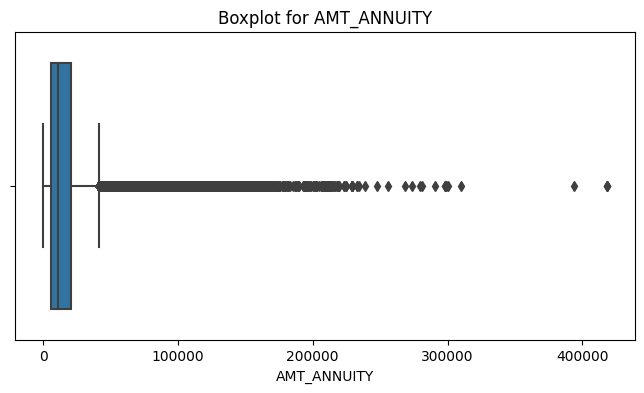

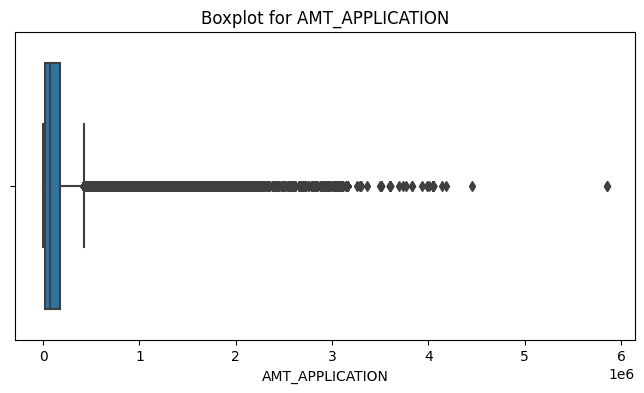

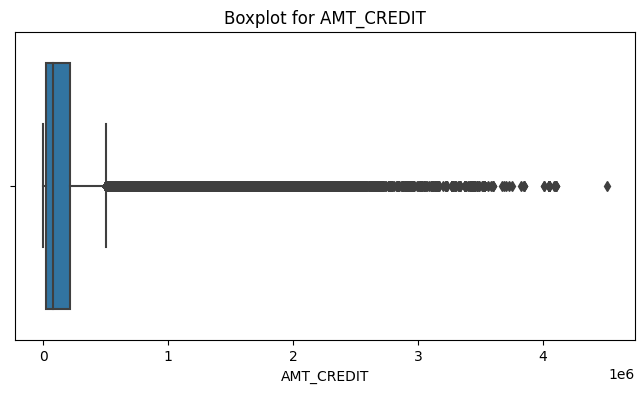

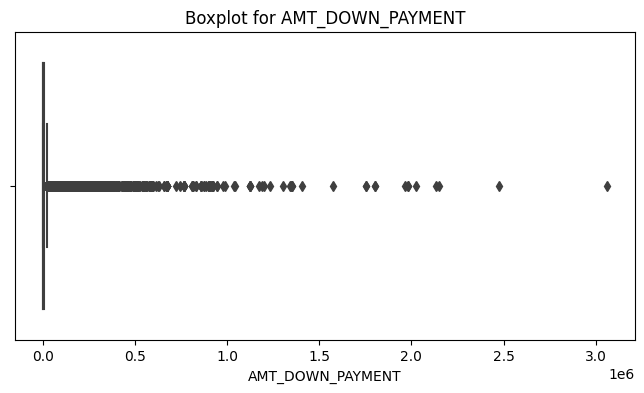

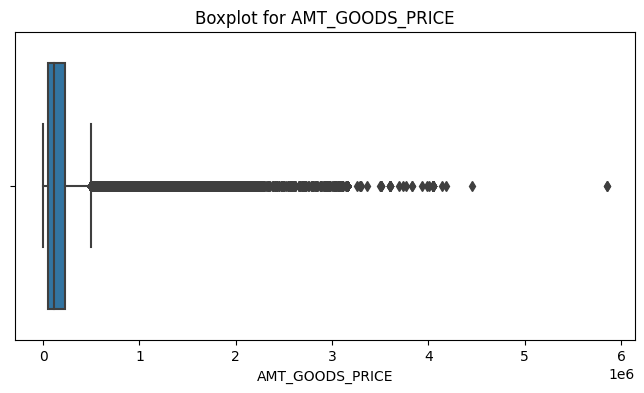

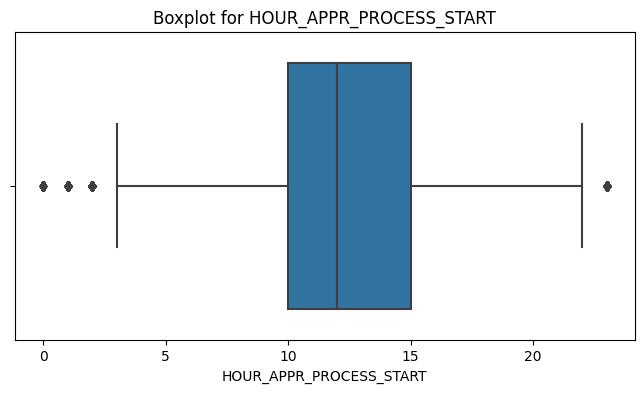

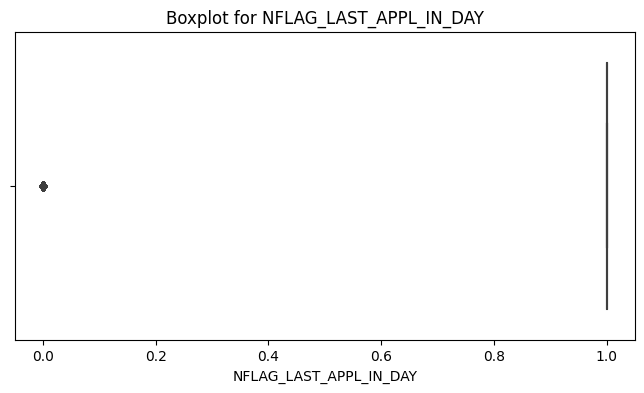

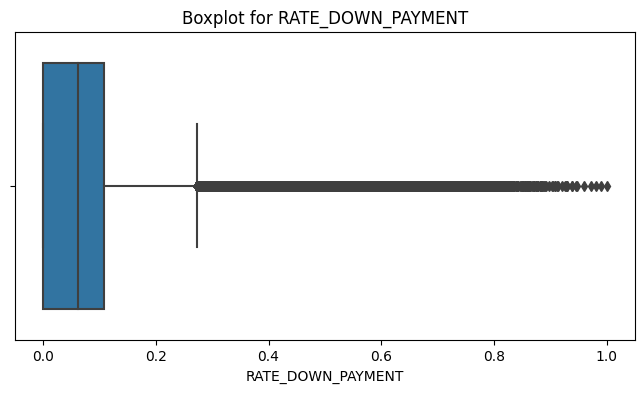

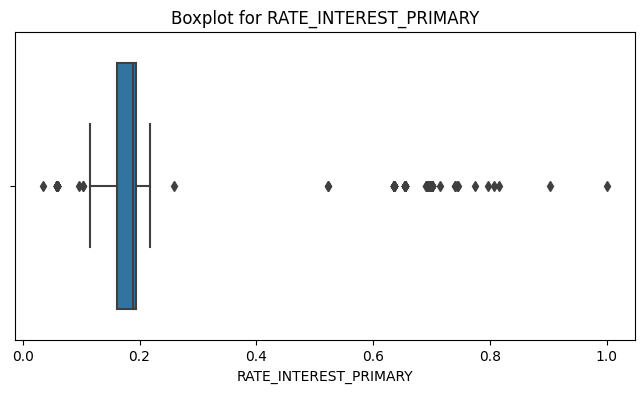

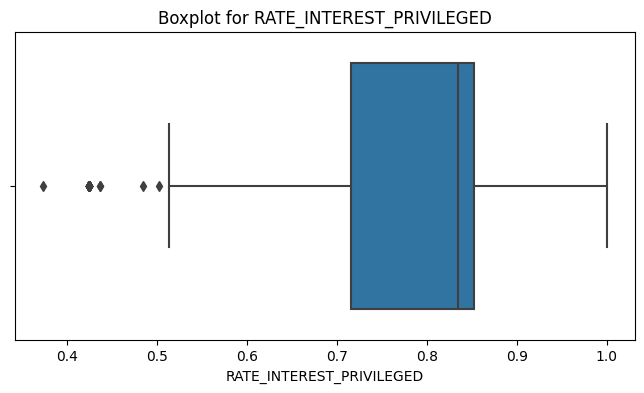

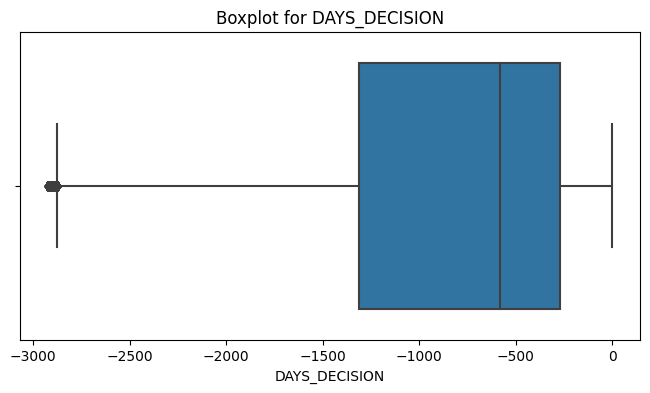

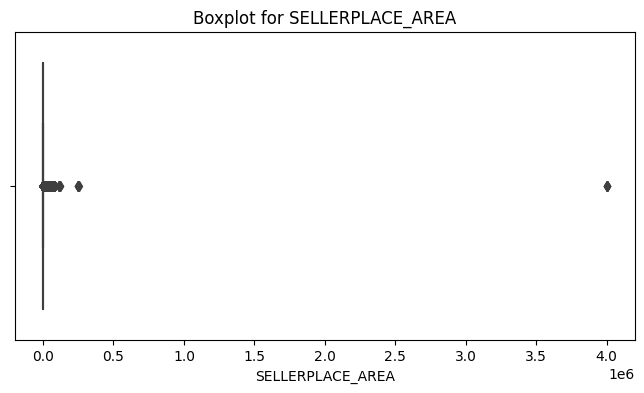

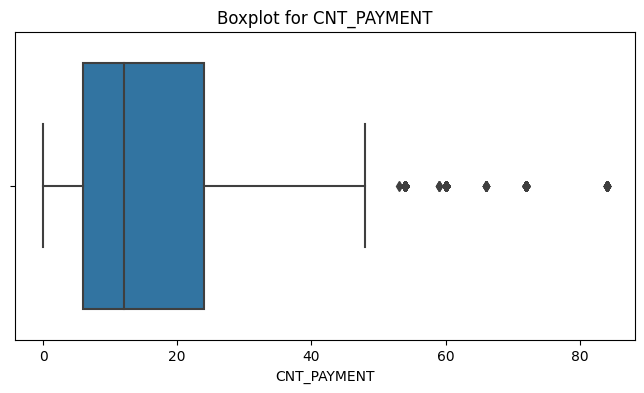

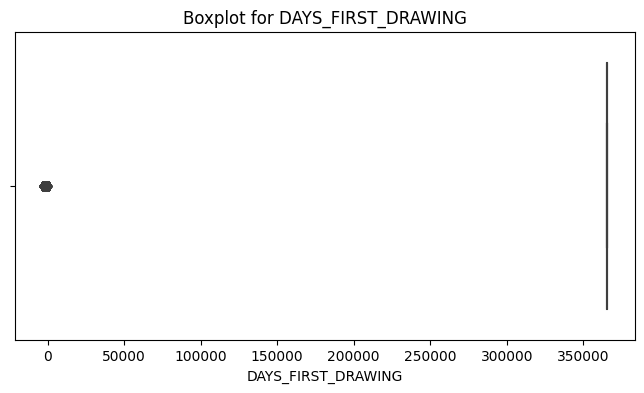

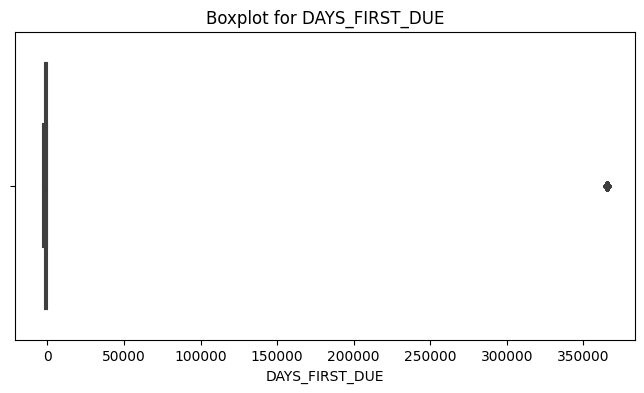

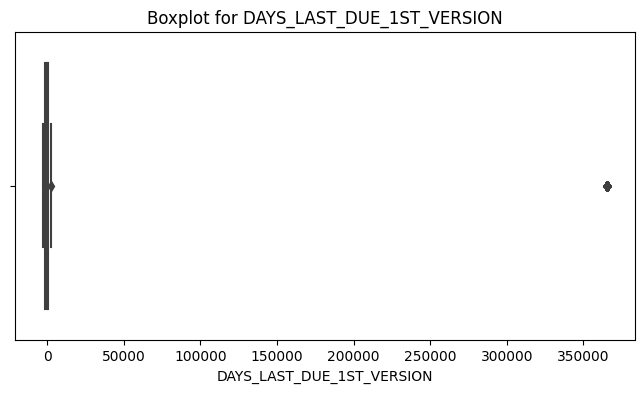

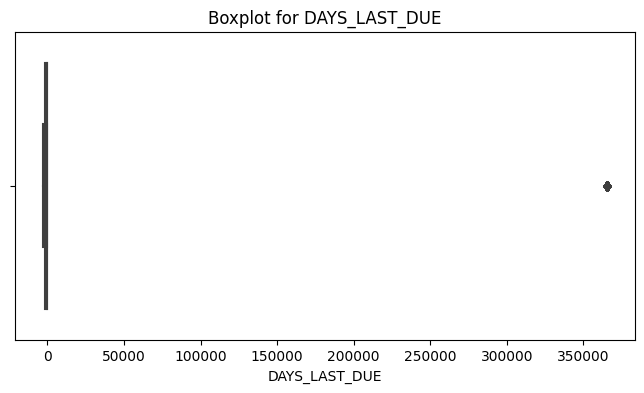

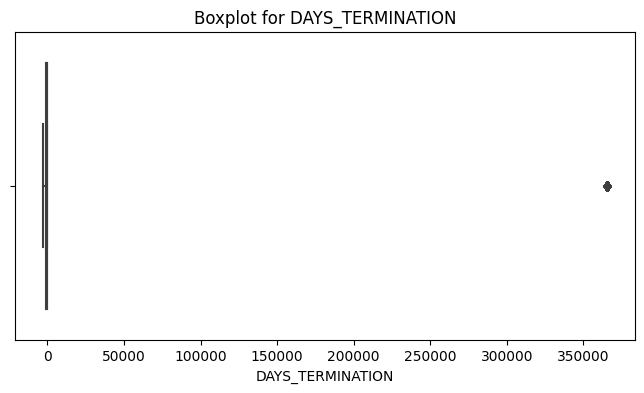

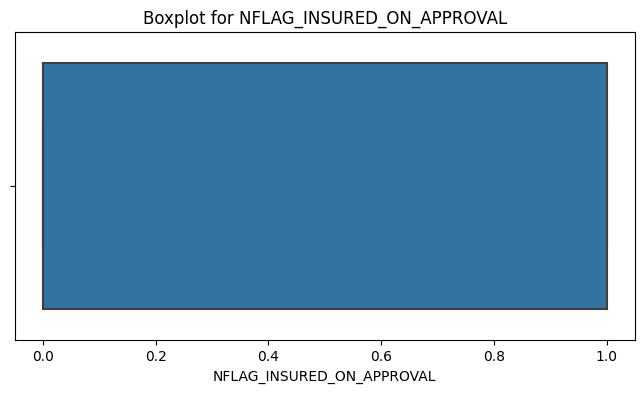

Rows with outliers:
         SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1           1696966      293189     Consumer loans    68258.655   
3           2802425       91587         Cash loans    25188.615   
4           1536272       91587         Cash loans    21709.125   
5           2068863       91587     Consumer loans     4830.930   
7           2517198       91587    Revolving loans    11250.000   
...             ...         ...                ...          ...   
1413692     1665450       66900     Consumer loans     9216.000   
1413693     1155662       96449     Consumer loans    13281.660   
1413694     2583449      111891         Cash loans    78879.195   
1413695     1538587      146247     Consumer loans     3190.185   
1413698     2319569       91682     Consumer loans     4716.495   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1              1800000.0   1754721.0          180000.0        1800000.0   
3               607500.0 

In [208]:
outlier(prev_application)

## Observations 2

### **Columns with Potential Outliers**

1. **Numerical Columns**:  
   - `NAME_CONTRACT_TYPE`, `AMT_ANNUITY`, `AMT_APPLICATION`, `AMT_CREDIT`, `AMT_DOWN_PAYMENT`, `AMT_GOODS_PRICE`:  
     No information about outliers was identified in these columns. Additional analysis or visualization may be required.

2. **Time-Related Columns**:  
   - `WEEKDAY_APPR_PROCESS_START`, `HOUR_APPR_PROCESS_START`:  
     No information about outliers was identified in these columns.

3. **Categorical Columns**:  
   - `FLAG_LAST_APPL_PER_CONTRACT`, `NFLAG_LAST_APPL_IN_DAY`, `RATE_DOWN_PAYMENT`, `RATE_INTEREST_PRIMARY`, `RATE_INTEREST_PRIVILEGED`, `NAME_CASH_LOAN_PURPOSE`, `NAME_CONTRACT_STATUS`, `DAYS_DECISION`, `NAME_PAYMENT_TYPE`, `CODE_REJECT_REASON`, `NAME_TYPE_SUITE`, `NAME_CLIENT_TYPE`, `NAME_GOODS_CATEGORY`, `NAME_PORTFOLIO`, `NAME_PRODUCT_TYPE`, `CHANNEL_TYPE`, `SELLERPLACE_AREA`, `NAME_SELLER_INDUSTRY`, `CNT_PAYMENT`, `NAME_YIELD_GROUP`, `PRODUCT_COMBINATION`:  
     No information about outliers in these categor- XNA: nan valueical columns.

4. **Date-Related Columns**:  
   - `DAYS_FIRST_DRAWING`, `DAYS_FIRST_DUE`, `DAYS_LAST_DUE_1ST_VERSION`, `DAYS_LAST`
   - _DUE`, `DAYS_TERM365243: NAN valuete-related columns.

5. **Binary Column**:  
   - `NFLAG_INSURED_ON_APPROVAL`:  
     No information about outliers in this binary column.

---

Further investigation or visualizations like box plots may help identify potential outliers in the columns listed above.


# 4. Checking missing values

In [209]:
def nan_percent(data):
    '''
    Function to create a dataframe of percentage of NaN values for each column of the dataframe

    Inputs:
        data (DataFrame): Input DataFrame

    Returns:
        DataFrame: A DataFrame containing the columns and their percentage of NaN values
    '''
    # Calculate the percentage of NaN values for each column
    nan_percentages = data.isnull().mean() * 100
    df_nan = nan_percentages.reset_index().rename(columns={0: 'Percentage_of_NaN', 'index': 'Column'})

    # Sorting the dataframe by decreasing order of percentage of NaN values
    df_nan = df_nan.sort_values(by='Percentage_of_NaN', ascending=False)

    return df_nan


def plot_nan_percent(df_nan, title_name, tight_layout=True, figsize=(20, 10), grid=False, rotation=90):
    '''
    Function to plot Bar Plots of NaN percentages for each Column with missing values

    Inputs:
        df_nan (DataFrame): DataFrame containing columns and their NaN percentages
        title_name (str): Title for the plot
        tight_layout (bool, default=True): Whether to use tight layout for the plot
        figsize (tuple, default=(20, 10)): Size of the plot
        grid (bool, default=False): Whether to display gridlines on the plot
        rotation (int, default=90): Degree of rotation for x-tick labels
    '''

    # Filter for columns with non-zero NaN percentages
    df_nan_nonzero = df_nan[df_nan['Percentage_of_NaN'] > 0]

    if not df_nan_nonzero.empty:
        print(f"Number of columns with NaN values: {df_nan_nonzero.shape[0]}")

        # Plotting the Bar Plot for NaN percentages
        plt.figure(figsize=figsize)
        sns.barplot(x='Column', y='Percentage_of_NaN', data=df_nan_nonzero, palette='Blues_r')
        plt.xticks(rotation=rotation)
        plt.xlabel(title_name, fontsize=13)
        plt.ylabel('Percentage of NaN', fontsize=13)
        plt.title(f'Percentage of NaN values in {title_name}', fontsize=22, weight='bold', pad=30)
        
        if grid:
            plt.grid(True)

        if tight_layout:
            plt.tight_layout()

        plt.show()
    else:
        print(f"The dataframe {title_name} does not contain any NaN values.")


In [210]:
nan_pv = nan_percent(prev_application)
nan_pv

,Column,Percentage_of_NaN
14,RATE_INTEREST_PRIVILEGED,99.661102
13,RATE_INTEREST_PRIMARY,99.661102
6,AMT_DOWN_PAYMENT,53.019698
12,RATE_DOWN_PAYMENT,53.019698
20,NAME_TYPE_SUITE,49.138538
36,NFLAG_INSURED_ON_APPROVAL,39.690571
35,DAYS_TERMINATION,39.690571
34,DAYS_LAST_DUE,39.690571
33,DAYS_LAST_DUE_1ST_VERSION,39.690571
32,DAYS_FIRST_DUE,39.690571


Number of columns with NaN values: 16


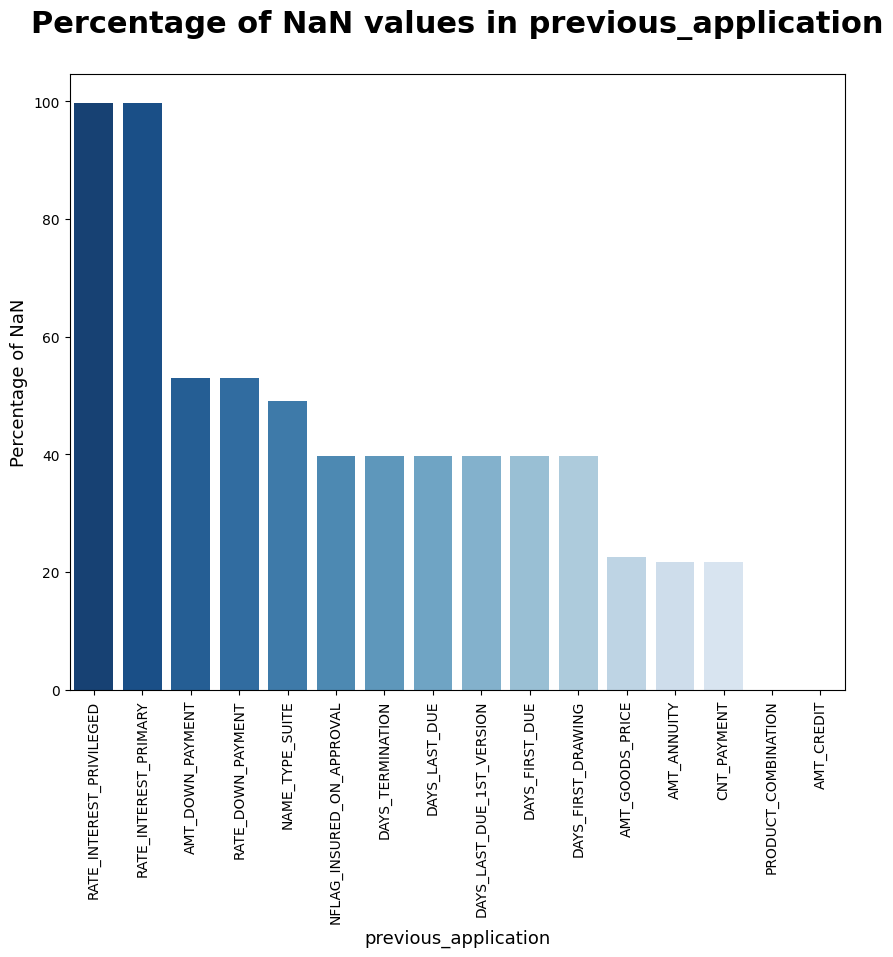

In [211]:
plot_nan_percent(nan_pv, 'previous_application', tight_layout = False, figsize = (10,8))

In [212]:
# Drop columns and assign back to the DataFrame
prev_application = prev_application.drop(labels=["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"], axis=1)

# Fill missing values and assign back to the DataFrame
prev_application["AMT_CREDIT"] = prev_application["AMT_CREDIT"].fillna(0)
prev_application["PRODUCT_COMBINATION"] = prev_application["PRODUCT_COMBINATION"].fillna(prev_application["PRODUCT_COMBINATION"].mode()[0])


Number of columns with NaN values: 12


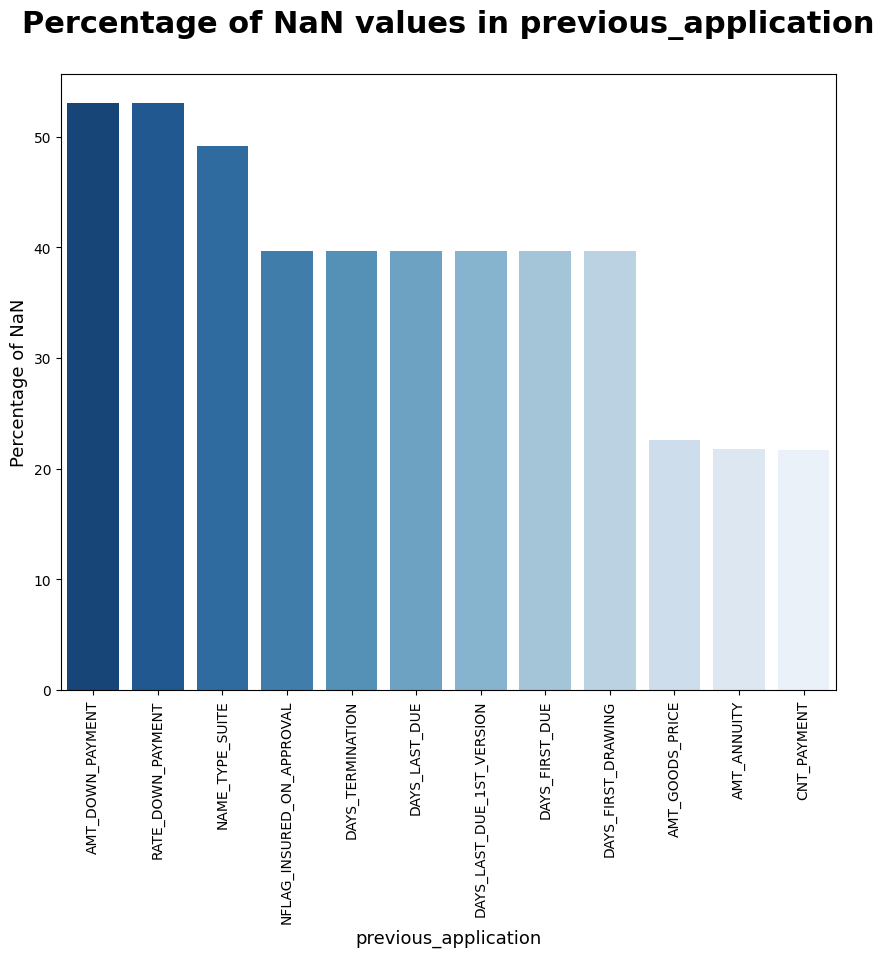

In [213]:
nan_pv = nan_percent(prev_application)
nan_pv
plot_nan_percent(nan_pv, 'previous_application', tight_layout = False, figsize = (10,8))

## Observations 3
**High Percentage of Missing Values (Greater than 20%):**
- `RATE_DOWN_PAYMENT`: 53.02%
- `AMT_DOWN_PAYMENT`: 53.02%
- `NAME_TYPE_SUITE`: 49.14%
- `DAYS_LAST_DUE`, `DAYS_FIRST_DRAWING`, `DAYS_LAST_DUE_1ST_VERSION`, `DAYS_FIRST_DUE`, `DAYS_TERMINATION`, `NFLAG_INSURED_ON_APPROVAL`: All have 39.69%
- `AMT_GOODS_PRICE`: 22.60%
- `AMT_ANNUITY` and `CNT_PAYMENT`: 21.73%

**Columns with No Missing Values:**
- `NAME_PORTFOLIO`, `PRODUCT_COMBINATION`, `NAME_YIELD_GROUP`, `NAME_SELLER_INDUSTRY`, `SELLERPLACE_AREA`, `CHANNEL_TYPE`, `NAME_PRODUCT_TYPE`, `SK_ID_PREV`, `NAME_GOODS_CATEGORY`, `NAME_CLIENT_TYPE`, `NAME_CONTRACT_TYPE`, `CODE_REJECT_REASON`, `NAME_PAYMENT_TYPE`, `DAYS_DECISION`, `NAME_CONTRACT_STATUS`, `NAME_CASH_LOAN_PURPOSE`, `NFLAG_LAST_APPL_IN_DAY`, `FLAG_LAST_APPL_PER_CONTRACT`, `HOUR_APPR_PROCESS_START`, `WEEKDAY_APPR_PROCESS_START`, `AMT_CREDIT`, `AMT_APPLICATION`, `SK_ID_CURR`: These columns have 0% missing values.


# 5. Checking categorical columns

In [214]:

def get_category_columns(data):
    """
    Returns a DataFrame with details about categorical columns, including unique value counts and NaN percentages.

    Parameters:
        data (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing feature names, unique counts, and NaN percentages.
    """
    category_columns = data.select_dtypes(include='object').columns
    column_info = pd.DataFrame({
        'Feature': category_columns,
        'Nunique': [data[col].nunique() for col in category_columns],
        'Percentage_of_NaN': [data[col].isnull().mean() * 100 for col in category_columns]
    }).sort_values(by='Percentage_of_NaN', ascending=False)
    return column_info

def plot_category_summary(data, name, figsize=(12, 8)):
    """
    Plots the number of unique values for categorical columns.

    Parameters:
        data (pd.DataFrame): The categorical column summary DataFrame.
        name (str): The dataset name.
        figsize (tuple): Figure size for the plot.
    """
    data = data.sort_values(by='Nunique', ascending=False)
    plt.figure(figsize=figsize)
    sns.barplot(x='Nunique', y='Feature', data=data, palette='Blues_r')
    plt.title(f'Unique Value Counts in Categorical Columns - {name}', fontsize=18, weight='bold')
    plt.xlabel('Number of Unique Values')
    plt.ylabel('Categorical Columns')
    plt.tight_layout()
    plt.show()

def plot_defaulter_comparison(data, x):
    """
    Plots pie charts for distribution of a categorical variable by default status.

    Parameters:
        data (pd.DataFrame): The input DataFrame with a "TARGET" column.
        column_name (str): Name of the categorical column to plot.
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    x1 = data[data["TARGET"] == 0][x].value_counts(
        normalize=True).sort_values(ascending=False)
    ax[0].pie(x1, labels=x1.index, autopct='%1.1f%%')
    ax[0].title.set_text("Non-defaulter")

    x2 = data[data["TARGET"] == 1][x].value_counts(
        normalize=True).sort_values(ascending=False)
    ax[1].pie(x2, labels=x2.index, autopct='%1.1f%%')
    ax[1].title.set_text("Defaulter")

    ax[1].legend(loc='upper right', bbox_to_anchor=(1.5, 1), title=x)

    for i in range(2):
        for text in ax[i].texts[::2]:
            text.set_visible(False)

    fig.suptitle(f"Distribution of {x}\nwith TARGET", fontsize=20)

    fig.tight_layout()
    plt.tight_layout()
    plt.show()


def print_unique_categories(data, column_name, show_counts=False):
    """
    Prints unique categories of a column and optionally their counts.

    Parameters:
        data (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the column to analyze.
        show_counts (bool): Whether to display counts for each category.
    """
    unique_values = data[column_name].unique()
    print(f"Unique categories in '{column_name}': {unique_values}")

    if show_counts:
        counts = data[column_name].value_counts()
        print(f"\nCounts for each category in '{column_name}':\n{counts}")


In [215]:
cate_pv = get_category_columns(prev_application)
cate_pv

,Feature,Nunique,Percentage_of_NaN
7,NAME_TYPE_SUITE,7,49.138538
0,NAME_CONTRACT_TYPE,4,0.000000
1,WEEKDAY_APPR_PROCESS_START,7,0.000000
2,FLAG_LAST_APPL_PER_CONTRACT,2,0.000000
3,NAME_CASH_LOAN_PURPOSE,25,0.000000
4,NAME_CONTRACT_STATUS,4,0.000000
5,NAME_PAYMENT_TYPE,4,0.000000
6,CODE_REJECT_REASON,9,0.000000
8,NAME_CLIENT_TYPE,4,0.000000
9,NAME_GOODS_CATEGORY,27,0.000000


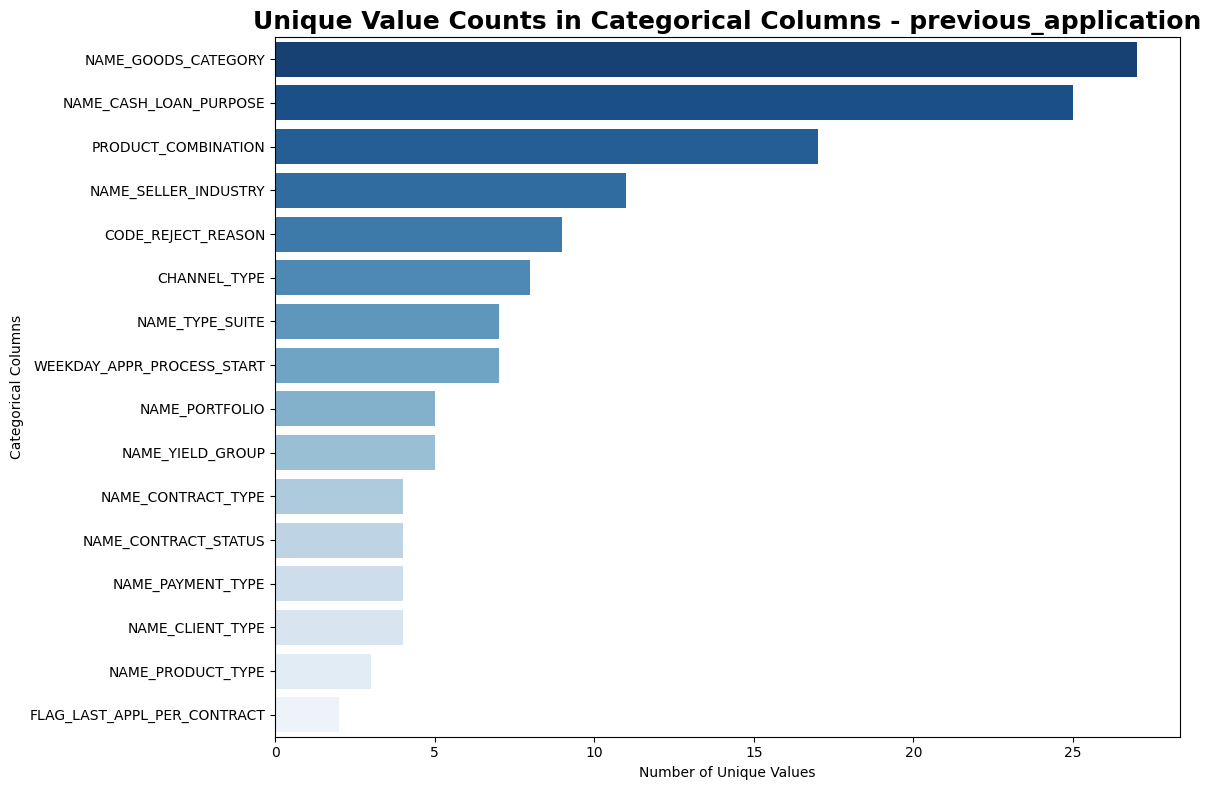

In [216]:
plot_category_summary(cate_pv, 'previous_application')

## Observations 4

- **Features with Complete Data (No Missing Values):**  
  - `NAME_CONTRACT_TYPE`  
  - `WEEKDAY_APPR_PROCESS_START`  
  - `FLAG_LAST_APPL_PER_CONTRACT`  
  - `NAME_CASH_LOAN_PURPOSE`  
  - `NAME_CONTRACT_STATUS`  
  - `NAME_PAYMENT_TYPE`  
  - `CODE_REJECT_REASON`  
  - `NAME_CLIENT_TYPE`  
  - `NAME_GOODS_CATEGORY`  
  - `NAME_PORTFOLIO`  
  - `NAME_PRODUCT_TYPE`  
  - `CHANNEL_TYPE`  
  - `NAME_SELLER_INDUSTRY`  
  - `NAME_YIELD_GROUP`  
  - `PRODUCT_COMBINATION`

- **Feature with Incomplete Data:**  
  - `NAME_TYPE_SUITE`: This column has **49.14% missing values**. Depending on its significance in your analysis, you could address this by applying imputation techniques or, if necessary, removing it entirely.

- **Unique Value Analysis:**  
  - Some features have a small number of distinct values, while others show a wider variety:  
    - Features like `FLAG_LAST_APPL_PER_CONTRACT`, `NAME_CLIENT_TYPE`, `NAME_PORTFOLIO`, and `NAME_PRODUCT_TYPE` are categorical with fewer unique values.  
    - Features such as `NAME_CASH_LOAN_PURPOSE`, `NAME_GOODS_CATEGORY`, `CHANNEL_TYPE`, and `NAME_SELLER_INDUSTRY` exhibit a greater number of distinct values, reflecting more diverse categories.


# 6. EDA

## 6.1. Correlation

In [217]:

class CorrelationMatrix:
    """
    Class to analyze and visualize correlations in a dataset.
    """

    def __init__(self, data, drop_columns=None, figsize=(20, 20), mask_upper=True, cmap='Blues', fontsize=10):
        self.data = data
        self.drop_columns = drop_columns or []
        self.figsize = figsize
        self.mask_upper = mask_upper
        self.cmap = cmap
        self.fontsize = fontsize

    def _mask_upper_triangle(self, matrix):
        """Creates a mask for the upper triangle of a matrix."""
        mask = np.zeros_like(matrix, dtype=bool)
        if self.mask_upper:
            mask[np.triu_indices_from(mask)] = True
        return mask

    def _plot_heatmap(self, matrix, title, annot=True, round_decimals=2):
        """Generic function to plot a heatmap."""
        plt.figure(figsize=self.figsize)
        mask = self._mask_upper_triangle(matrix)
        annot_vals = abs(matrix.round(round_decimals)).astype(str) if annot else None
        sns.heatmap(matrix, annot=annot_vals, mask=mask, cmap=self.cmap, fmt='', linewidths=0.5)
        plt.title(title, fontsize=16, weight='bold', pad=20)
        plt.xticks(fontsize=self.fontsize, rotation=90)
        plt.yticks(fontsize=self.fontsize)
        plt.tight_layout()
        plt.show()

    def plot_correlation_matrix(self, method='pearson', round_decimals=2):
        """Plots a heatmap of numerical feature correlations."""
        data = self.data.drop(columns=self.drop_columns + ['TARGET'], errors='ignore')
        corr_matrix = data.corr(method=method)
        self._plot_heatmap(corr_matrix, "Correlation Heatmap for Numerical Features", round_decimals=round_decimals)

    def target_top_corr(self, target_column='TARGET', top_n=10):
        """Returns top features correlated with the target."""
        phik_values = [
            self.data[[target_column, col]].phik_matrix().iloc[0, 1]
            for col in self.data.columns if col != target_column
        ]
        corr_df = pd.DataFrame({'Feature': self.data.columns.drop(target_column), 'Phik': phik_values})
        return corr_df.nlargest(top_n, 'Phik')


def numeric_corr_heatmap(data, method='pearson', figsize=(10, 10), cmap='Blues'):
    """Plots a heatmap of correlations for numerical features."""
    corr_matrix = data.select_dtypes(include='number').corr(method=method)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
    plt.title("Correlation of Numerical Features", fontsize=16, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()


def plot_phik_matrix(data, categorical_columns, target_column='TARGET', figsize=(20, 20), top_n=10, cmap='Blues'):
    """Plots a Phi-K correlation heatmap and displays top correlated features with the target."""
    data = data[categorical_columns].astype('object')
    phik_matrix = data.phik_matrix()

    mask = np.triu(np.ones_like(phik_matrix, dtype=bool))
    plt.figure(figsize=figsize)
    sns.heatmap(phik_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
    plt.title("Phi-K Correlation Heatmap for Categorical Features", fontsize=16, weight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    if target_column in data.columns:
        target_corr = phik_matrix[target_column].drop(index=target_column).nlargest(top_n)
        print("\nTop correlated features with target:")
        display(target_corr)


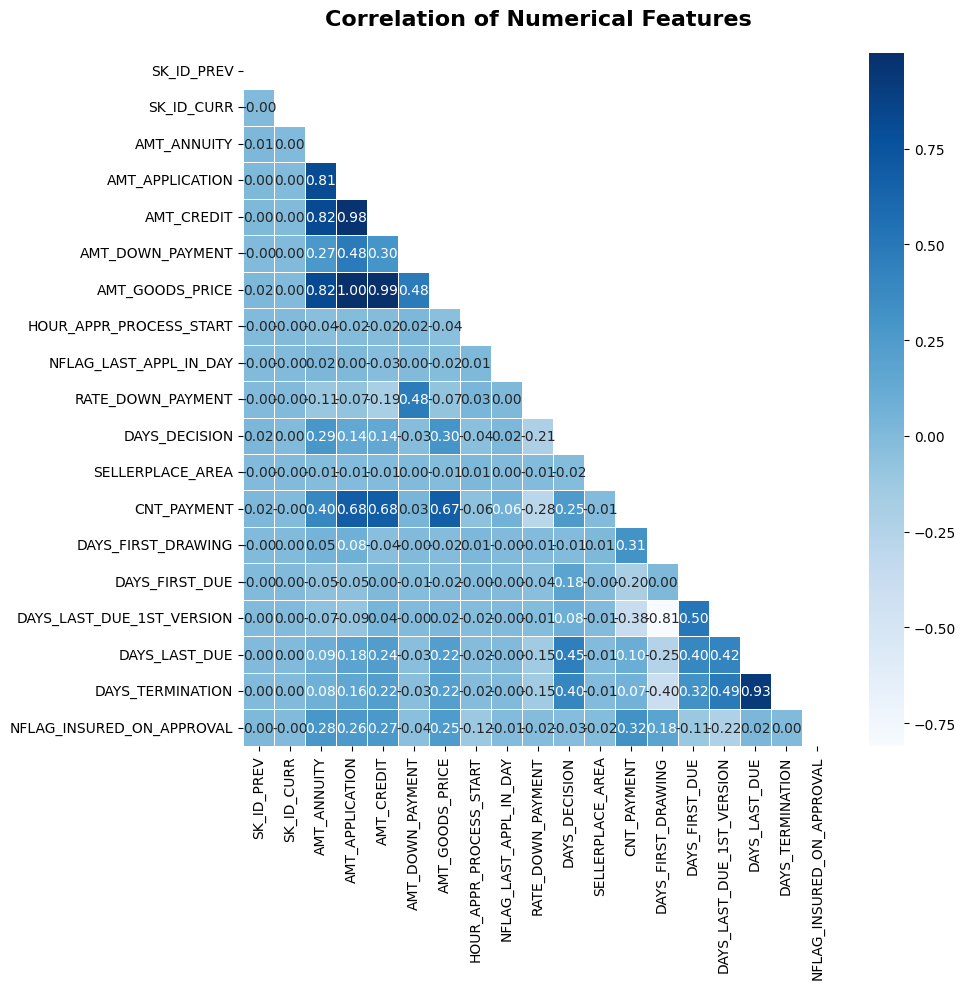

In [218]:
numeric_corr_heatmap(prev_application)

### Observations 5
- **Highly Correlated Features**:
  - `"DAYS_LAST_DUE"` and `"DAYS_TERMINATION"`
  - `"DAYS_FIRST_DRAWING"` and `"DAYS_LAST_DUE_1ST_VERSION"`
  - `"AMT_ANNUITY"`, `"AMT_APPLICATION"`, `"AMT_CREDIT"`, and `"AMT_GOODS_PRICE"`

- **Features to Remove**:
  - `"DAYS_TERMINATION"`
  - `"DAYS_LAST_DUE_1ST_VERSION"`
  - `"AMT_APPLICATION"`
  - `"AMT_CREDIT"`
  - `"AMT_GOODS_PRICE"`
  
  These features should be removed to prevent collinearity.


In the Home Credit dataset, the values 365243 in the columns DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, and DAYS_TERMINATION are placeholders used to indicate missing or undefined dates.

In [219]:
prev_app_drop = prev_application.drop(["SK_ID_PREV"], axis=1)
prev_app_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413701 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       1413701 non-n

## 6.2 Merge with application_train

In [220]:
prev_app_merged = pd.merge(application_train[['SK_ID_CURR','TARGET']], prev_application, how = 'left', on=['SK_ID_CURR'])
prev_app_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,278621,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1,278621,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
2,278621,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,139008,0,2078043.0,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,15.0,Y,1.0,NaN,XNA,Approved,-181.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
4,139008,0,2827850.0,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,15.0,Y,1.0,NaN,XAP,Canceled,-181.0,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144069,258328,0,2073384.0,Cash loans,16400.610,229500.0,254340.0,NaN,229500.0,THURSDAY,12.0,Y,1.0,NaN,XNA,Approved,-648.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1144070,258328,0,1708056.0,Revolving loans,2250.000,45000.0,45000.0,NaN,45000.0,SUNDAY,14.0,Y,1.0,NaN,XAP,Refused,-456.0,XNA,HC,Unaccompanied,Repeater,XNA,Cards,walk-in,Country-wide,20.0,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1144071,258328,0,1296007.0,Cash loans,30737.655,765000.0,1067940.0,NaN,765000.0,FRIDAY,14.0,Y,1.0,NaN,Repairs,Refused,-171.0,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1144072,258328,0,2631384.0,Cash loans,54022.140,1170000.0,1271929.5,NaN,1170000.0,FRIDAY,14.0,Y,1.0,NaN,XNA,Approved,-787.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.0,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [221]:
prev_app_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144074 entries, 0 to 1144073
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1144074 non-null  int64  
 1   TARGET                       1144074 non-null  int64  
 2   SK_ID_PREV                   1130891 non-null  float64
 3   NAME_CONTRACT_TYPE           1130891 non-null  object 
 4   AMT_ANNUITY                  885179 non-null   float64
 5   AMT_APPLICATION              1130891 non-null  float64
 6   AMT_CREDIT                   1130891 non-null  float64
 7   AMT_DOWN_PAYMENT             530908 non-null   float64
 8   AMT_GOODS_PRICE              875347 non-null   float64
 9   WEEKDAY_APPR_PROCESS_START   1130891 non-null  object 
 10  HOUR_APPR_PROCESS_START      1130891 non-null  float64
 11  FLAG_LAST_APPL_PER_CONTRACT  1130891 non-null  object 
 12  NFLAG_LAST_APPL_IN_DAY       1130891 non-n

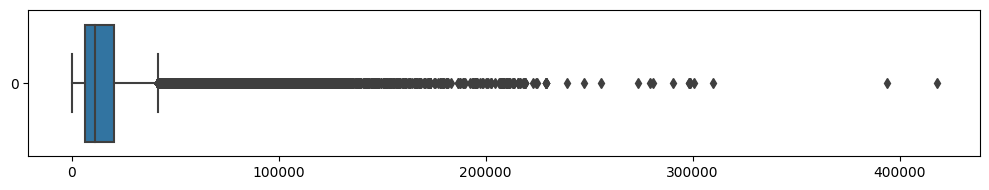

In [222]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_app_merged["AMT_ANNUITY"], orient='h')

plt.tight_layout()
plt.show()

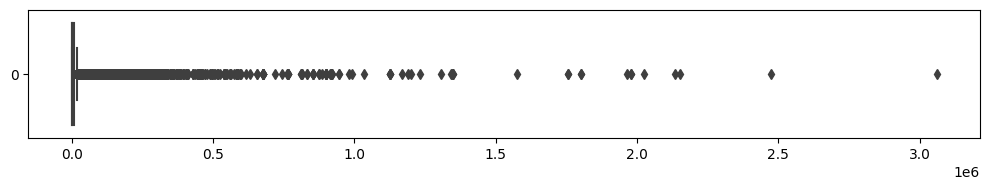

In [223]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_app_merged["AMT_DOWN_PAYMENT"], orient='h')

plt.tight_layout()
plt.show()

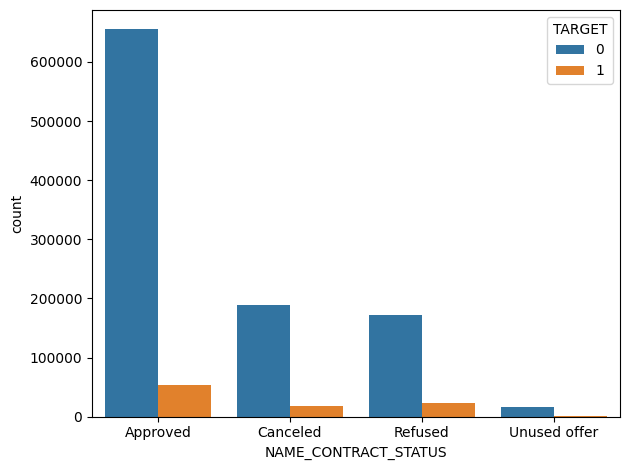

In [224]:
sns.countplot(x = prev_app_merged["NAME_CONTRACT_STATUS"], hue = prev_app_merged["TARGET"].astype('str'))

plt.tight_layout()
plt.show()

prev_app: info about the previous loans, with the TARGET(1: default, 0: no default), we consider whether the previous loan can help us to classify whether the current loan can be a default

In [225]:
total_approved = prev_app_merged[prev_app_merged["NAME_CONTRACT_STATUS"] == "Approved"].shape[0]
default_approved = prev_app_merged[(prev_app_merged["NAME_CONTRACT_STATUS"] == "Approved") & (prev_app_merged["TARGET"] == 1)].shape[0]
# default rate: rate that the loans become
print(f"default rate of customers with previous approved loans: {round(default_approved/total_approved, 3) * 100}%")

default rate of customers with previous approved loans: 7.6%


In [226]:
total_refused = prev_app_merged[prev_app_merged["NAME_CONTRACT_STATUS"] == "Refused"].shape[0]
nondefault_refused = prev_app_merged[(prev_app_merged["NAME_CONTRACT_STATUS"] == "Refused") & (prev_app_merged["TARGET"] == 0)].shape[0]

print(f"Rate of customers who were denied previous loans but successfully \
repaid the current loans: {round(nondefault_refused/total_refused, 3) * 100}%")

Rate of customers who were denied previous loans but successfully repaid the current loans: 88.1%


In [227]:
def plot_distribution(data, column_name, column_name2=None,
                      plot_type='dist', nrows=1, ncols=2,
                      figsize=(12, 6), dropna=False,
                      sort_values=False, bins='auto', palette='Blues_r'):
    """
    Function to plot the distribution of a variable related to a target variable.
    """
    if plot_type == 'scatter' and column_name2 is None:
        raise ValueError("You must provide `column_name2` for scatter plots.")
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()

    if dropna:
        data = data.dropna(subset=[column_name, column_name2] if column_name2 else [column_name])
    if sort_values:
        data = data.sort_values(by=column_name)

    targets = data['TARGET'].unique()
    for i, target in enumerate(targets):
        subset = data[data['TARGET'] == target]
        title = f"Target = {target}"
        
        if plot_type == 'dist':
            sns.histplot(subset[column_name], bins=bins, kde=True, ax=ax[i])
        elif plot_type == 'hist':
            sns.histplot(subset[column_name], bins=bins, kde=False, ax=ax[i])
        elif plot_type == 'count':
            sns.countplot(x=subset[column_name], ax=ax[i], palette=palette)
        elif plot_type == 'box':
            sns.boxplot(x=subset[column_name], ax=ax[i], orient='h')
        elif plot_type == 'scatter':
            sns.scatterplot(
                x=subset[column_name],
                y=subset[column_name2],
                ax=ax[i],
                color="blue" if target == 0 else "orange"  # Assign colors manually
            )

        ax[i].set_title(title)
        ax[i].tick_params(axis='x', rotation=45)

    fig.tight_layout()
    plt.show()


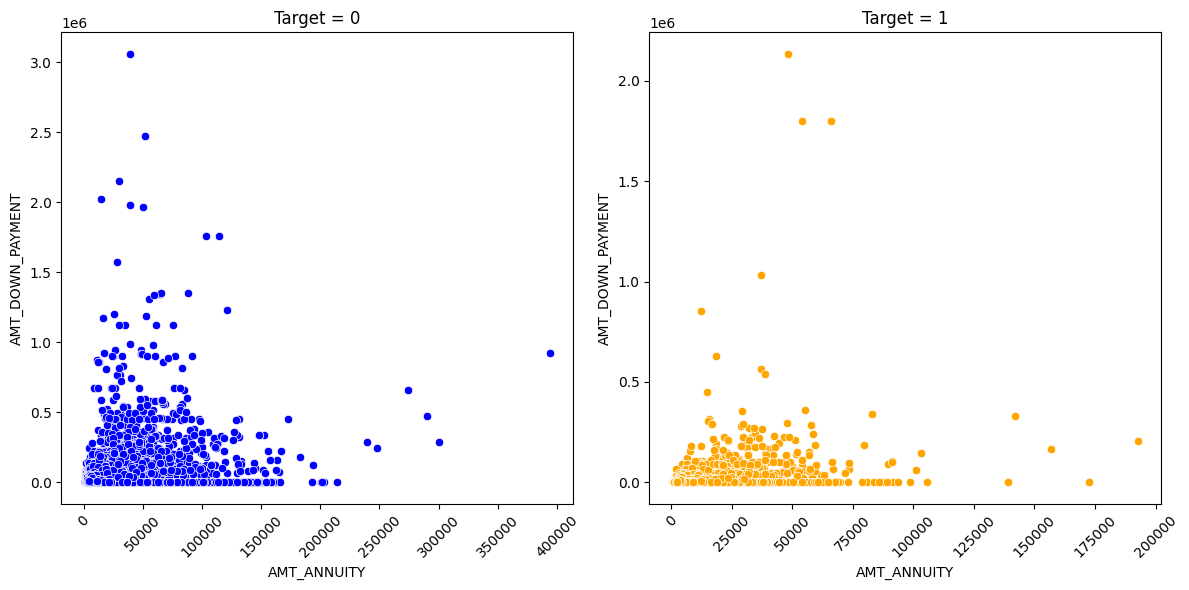

In [228]:
plot_distribution(data = prev_app_merged, column_name='AMT_ANNUITY', column_name2='AMT_DOWN_PAYMENT', plot_type='scatter')

- The higher the AMT_ANNUITY (Annuity of previous application: khoản thanh toán định kỳ của đơn vay trước đó) , the lower the number of defaulters-  The higher the DOWN_PAYMEN(Khoản thanh toán đầu tiên trong đơn xin vay trước đó)T, the lower the number of defaulters

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


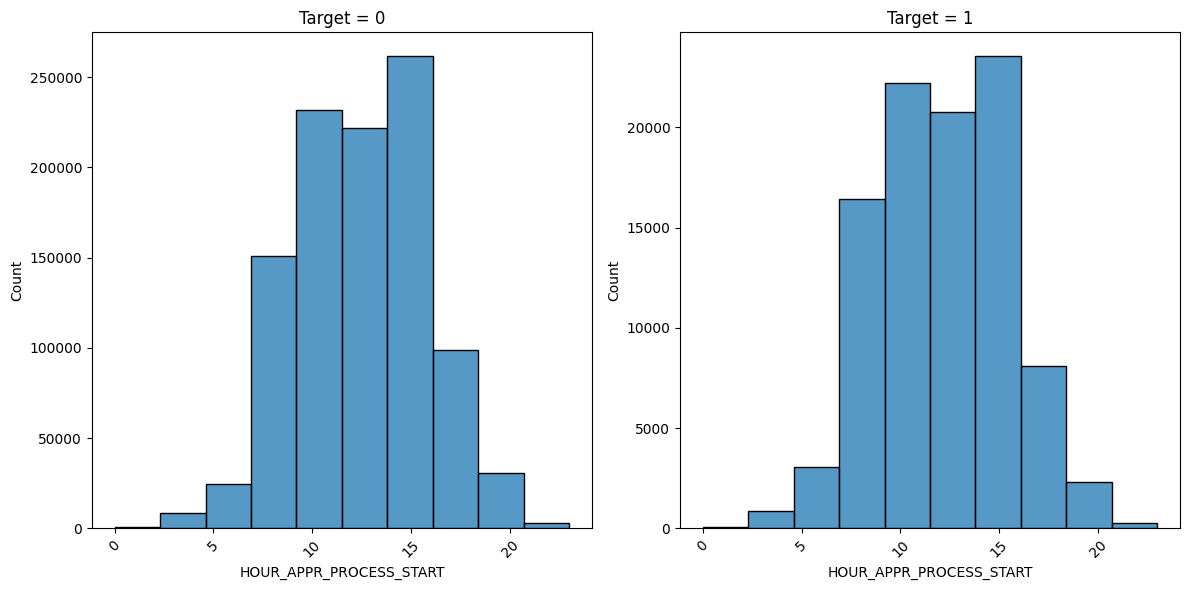

In [229]:
plot_distribution(data = prev_app_merged, column_name='HOUR_APPR_PROCESS_START', plot_type='hist', bins=10, figsize=(12,6), nrows=1, ncols=2)

HOUR_APPR_PROCESS_START: Approximately at what day hour did the client apply for the previous application (Khoảng thời gian trong ngày mà khách hàng nộp đơn vay trước đó) 

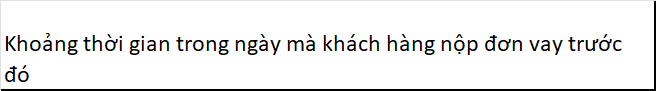
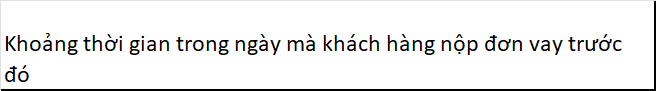
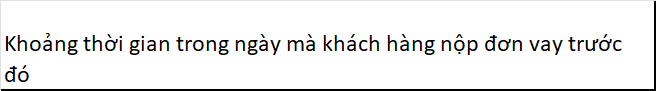
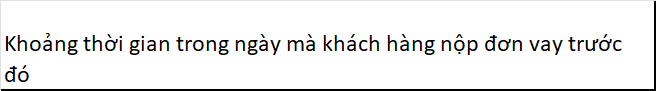

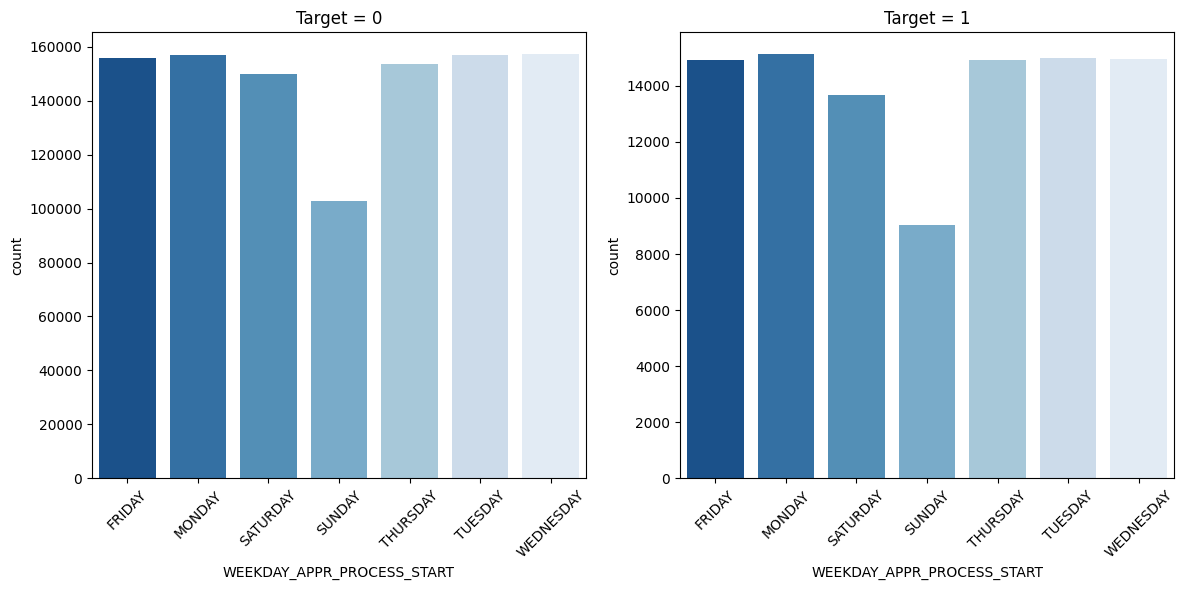

In [230]:
plot_distribution(data = prev_app_merged, column_name='WEEKDAY_APPR_PROCESS_START', plot_type='count', sort_values=True)

WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for previous application (Ngày trong tuần mà khách hàng nộp đơn vay trước đó)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


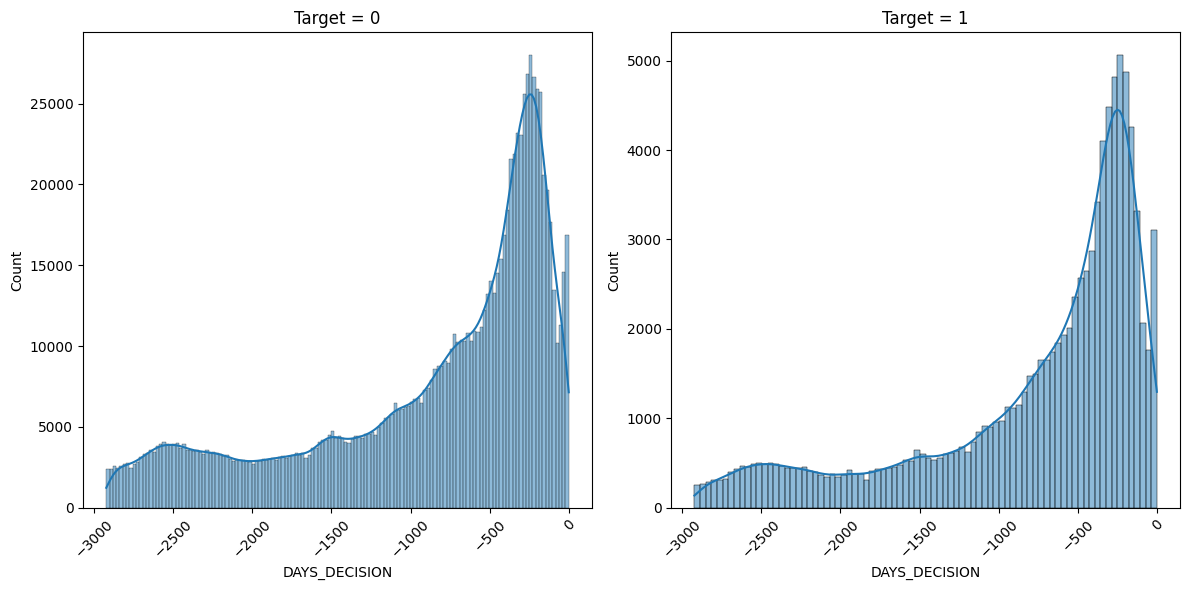

In [231]:
plot_distribution(data = prev_app_merged, column_name='DAYS_DECISION', plot_type='dist', sort_values=True)

- DAYS_DECISION: Relative to current application when was the decision about previous application made (Quyết định về đơn xin vay trước đó được đưa ra khi nào so với đơn vay hiện tại)- Đơn cho vay trước đó đối với cả non-defaulters và defaulters đều có phân phối về ngày quyết định tương đương nhau

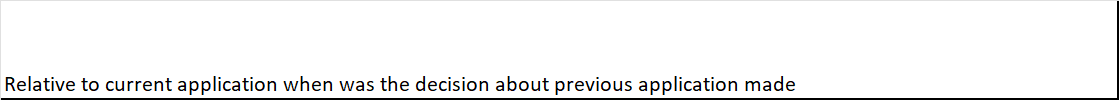
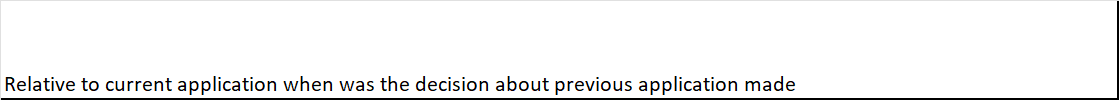
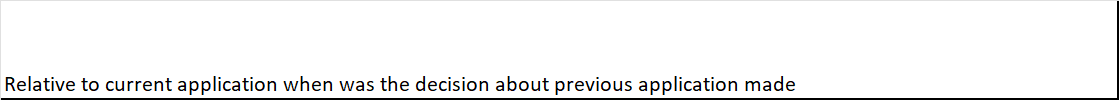
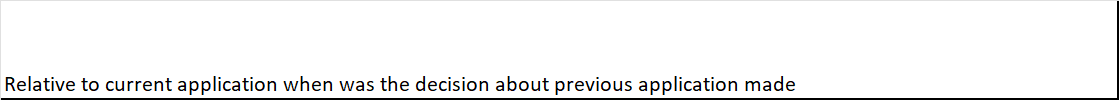

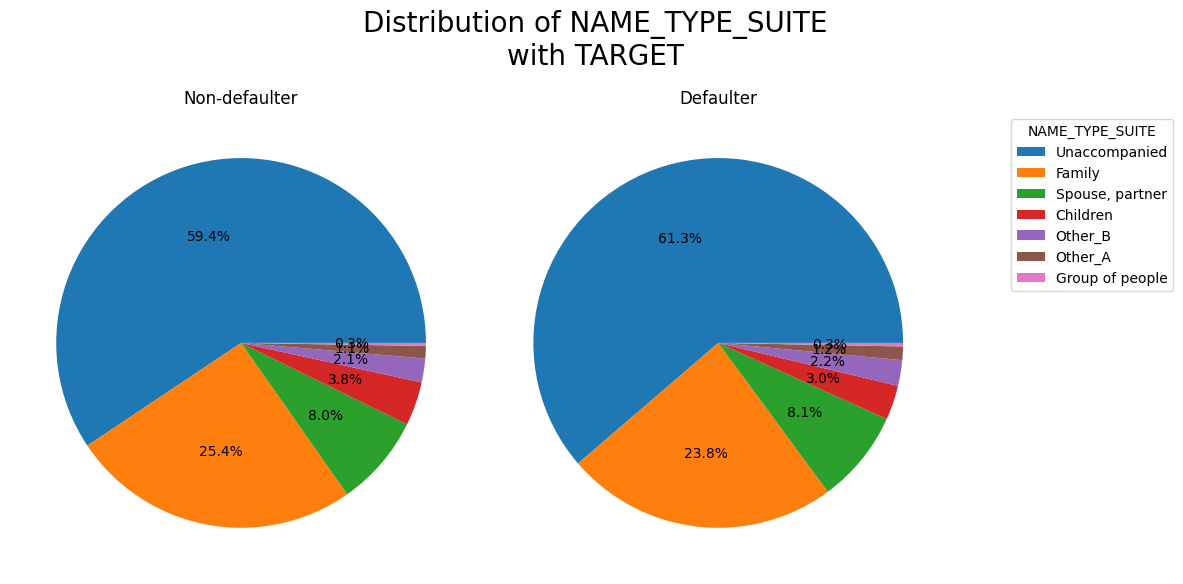

In [232]:
plot_defaulter_comparison(data= prev_app_merged,x= "NAME_TYPE_SUITE")

NAME_TYPE_SUITE: Who accompanied client when applying for the previous application (Ai đã đi cùng khách hàng khi nộp đơn vay trước đó)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


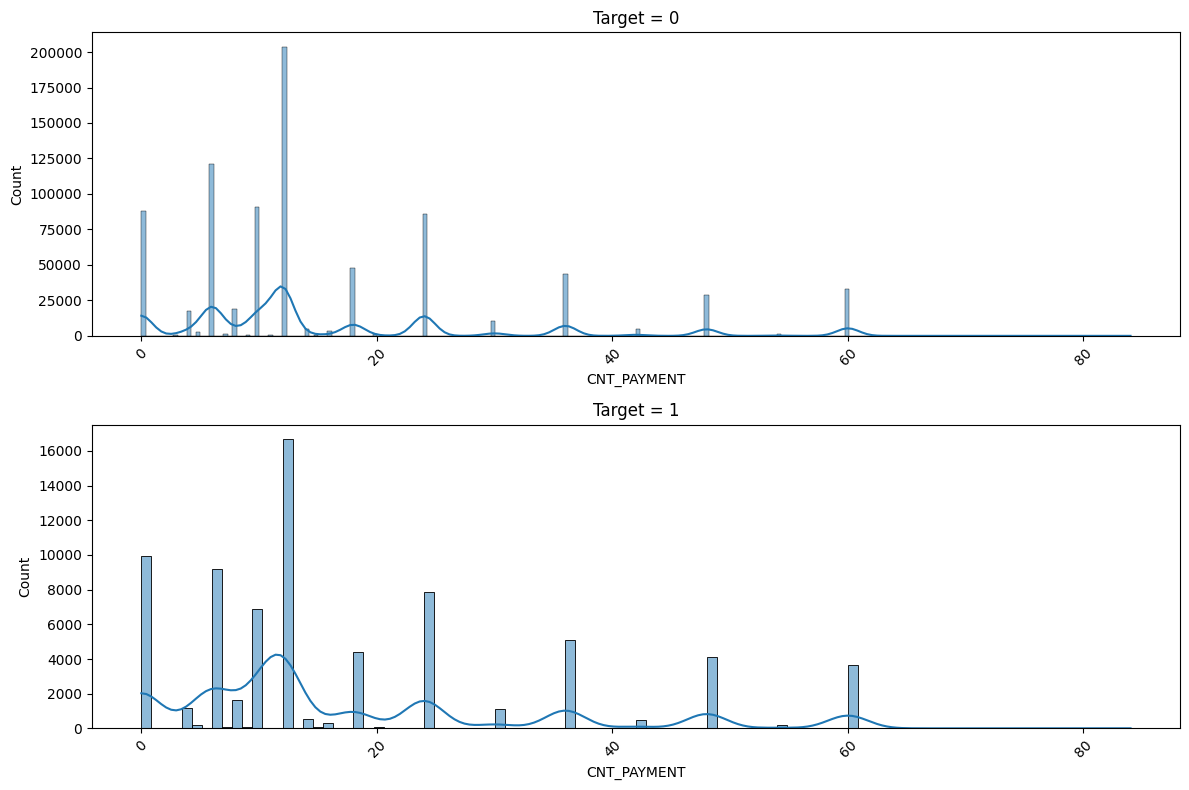

In [233]:
plot_distribution(data = prev_app_merged, column_name='CNT_PAYMENT', plot_type='dist', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

CNT_PAYMENT: Term of previous credit at application of the previous application (Thời hạn của khoản vay trước tại thời điểm nộp đơn vay trước đó)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


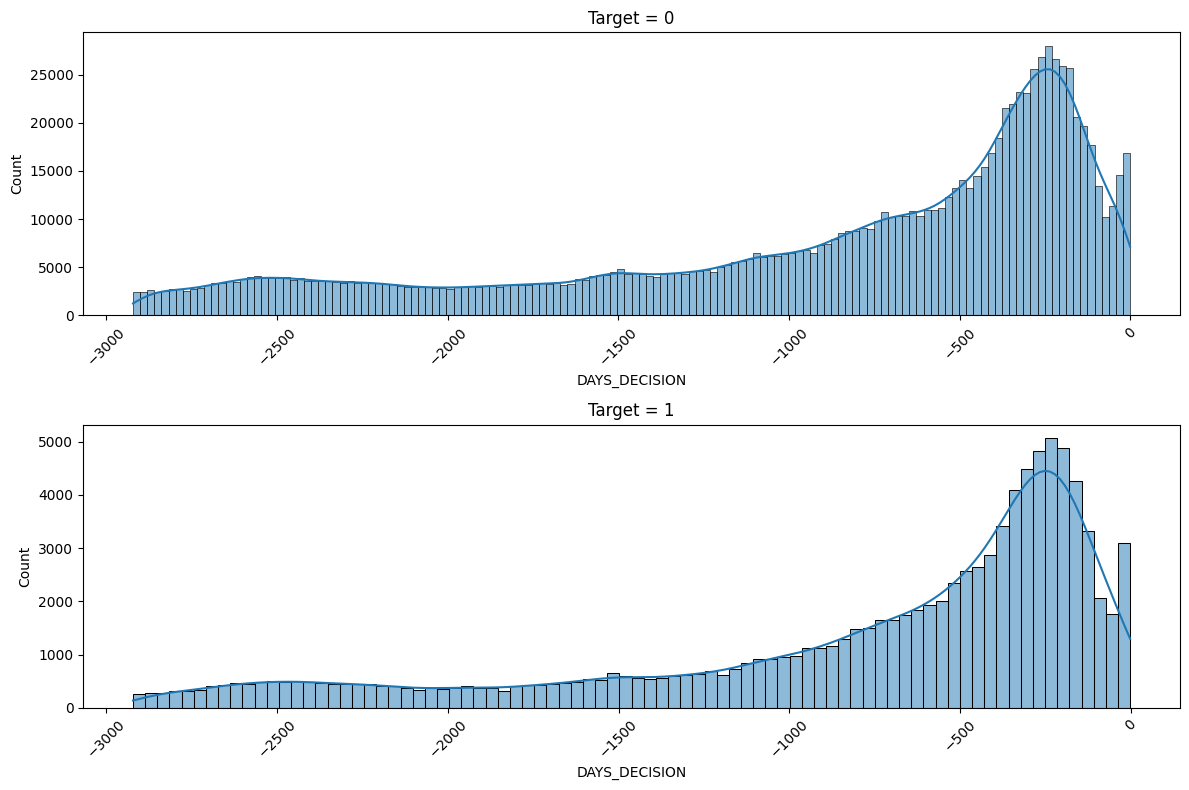

In [234]:
plot_distribution(data = prev_app_merged, column_name='DAYS_DECISION', plot_type='dist', figsize=(12,8), nrows=2, ncols=1, sort_values=True)

DAYS_DECISION: Relative to current application when was the decision about previous application made (Quyết định về đơn xin vay trước đó được đưa ra khi nào so với đơn vay hiện tại)

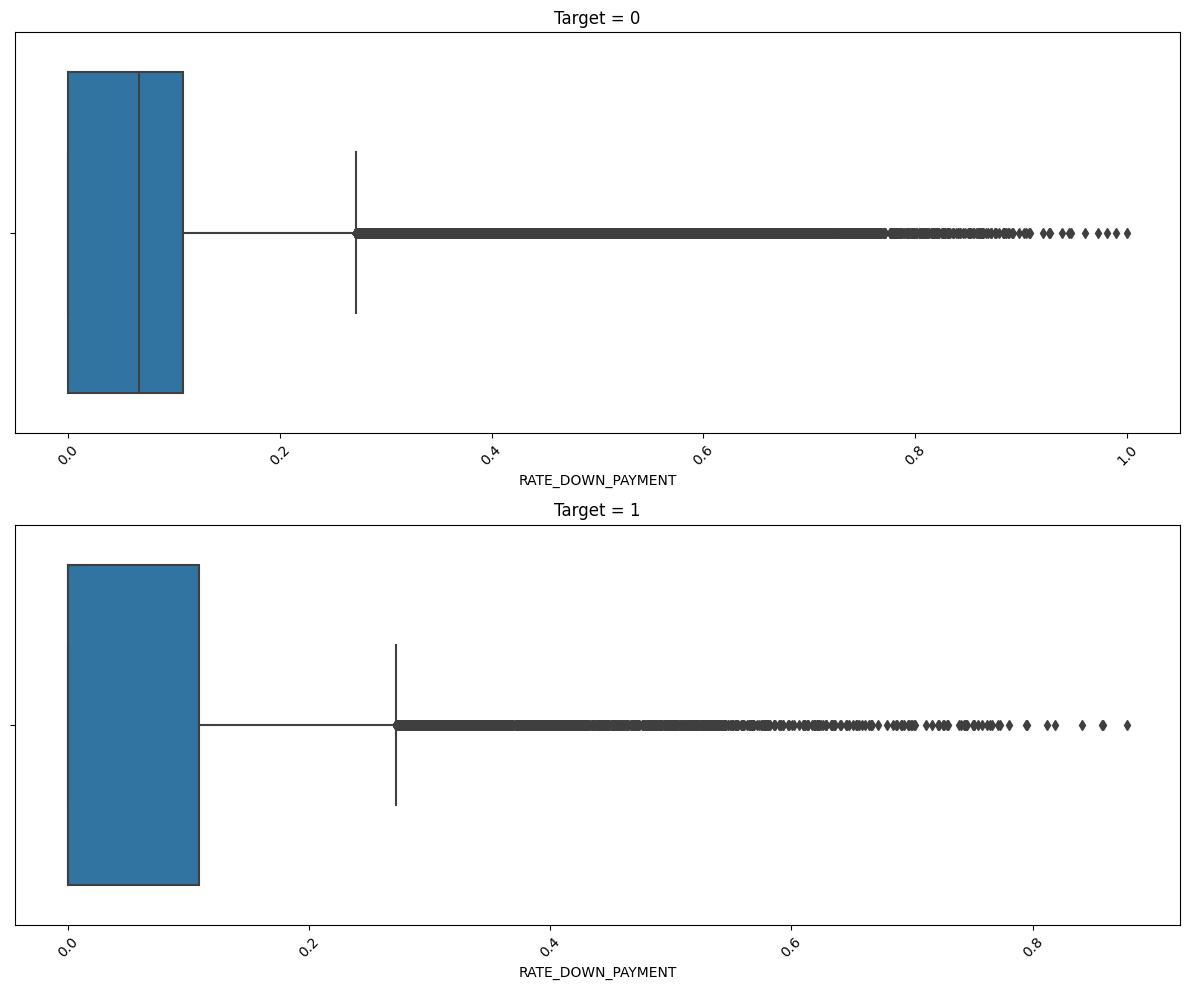

In [235]:
plot_distribution(data = prev_app_merged, column_name='RATE_DOWN_PAYMENT', plot_type='box', figsize=(12,10), nrows=2, ncols=1, dropna=False)

RATE_DOWN_PAYMENT: Down payment rate normalized on previous credit. A down payment on a house is the money a buyer pays upfront to complete the real estate transaction. Tỷ lệ của số tiền trong lần thanh toán đầu tiên trên khoản vay của khoản vay trước đó

In [236]:
print('RATE_DOWN_PAYMENT TARGET = 0 \n', prev_app_merged[prev_app_merged["TARGET"] == 0]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99]), '\n')
print('RATE_DOWN_PAYMENT TARGET = 1 \n',prev_app_merged[prev_app_merged["TARGET"] == 1]['RATE_DOWN_PAYMENT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99]))

RATE_DOWN_PAYMENT TARGET = 0 
 0.50    0.067511
0.70    0.108909
0.90    0.212423
0.95    0.300528
0.99    0.523630
Name: RATE_DOWN_PAYMENT, dtype: float64 

RATE_DOWN_PAYMENT TARGET = 1 
 0.50    0.000000
0.70    0.103968
0.90    0.200064
0.95    0.238156
0.99    0.481678
Name: RATE_DOWN_PAYMENT, dtype: float64


## 6.3. Categorical variates

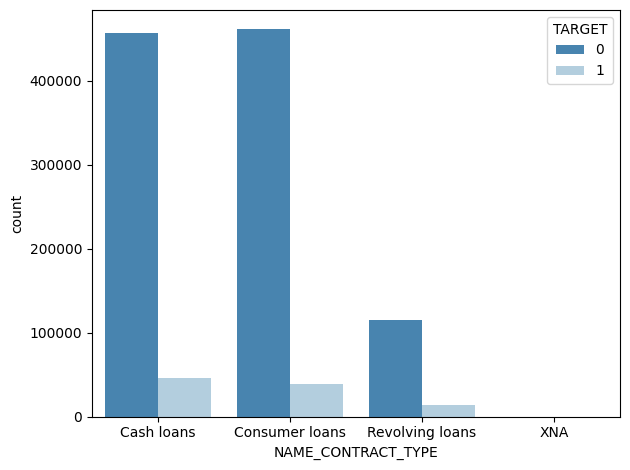

In [237]:
sns.countplot(x = prev_app_merged["NAME_CONTRACT_TYPE"], hue= prev_app_merged["TARGET"], palette= "Blues_r")
plt.tight_layout()
plt.show()

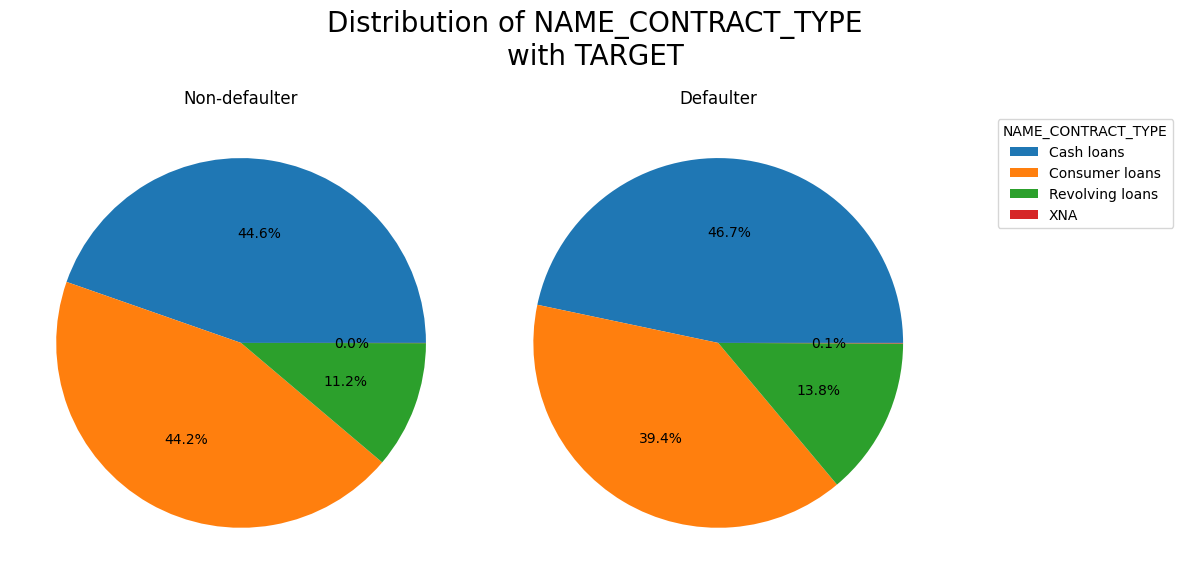

In [238]:
plot_defaulter_comparison(prev_app_merged, "NAME_CONTRACT_TYPE")

**XNA/XAP denote NA values**

**Most of the loan is cash loans**

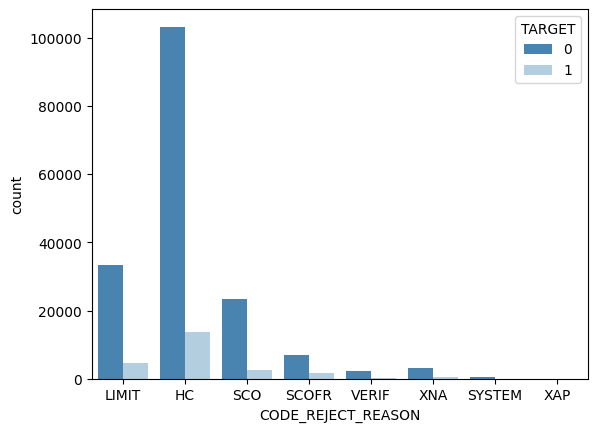

In [239]:
sns.countplot(x = prev_app_merged[prev_app_merged["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"], hue= prev_app_merged["TARGET"], palette= "Blues_r")
plt.show()

In [240]:
prev_app_merged[prev_app_merged["NAME_CONTRACT_STATUS"] == "Refused"]["CODE_REJECT_REASON"].value_counts()

CODE_REJECT_REASON
HC        116812
LIMIT      38037
SCO        26096
SCOFR       8697
XNA         3516
VERIF       2452
SYSTEM       515
XAP            1
Name: count, dtype: int64

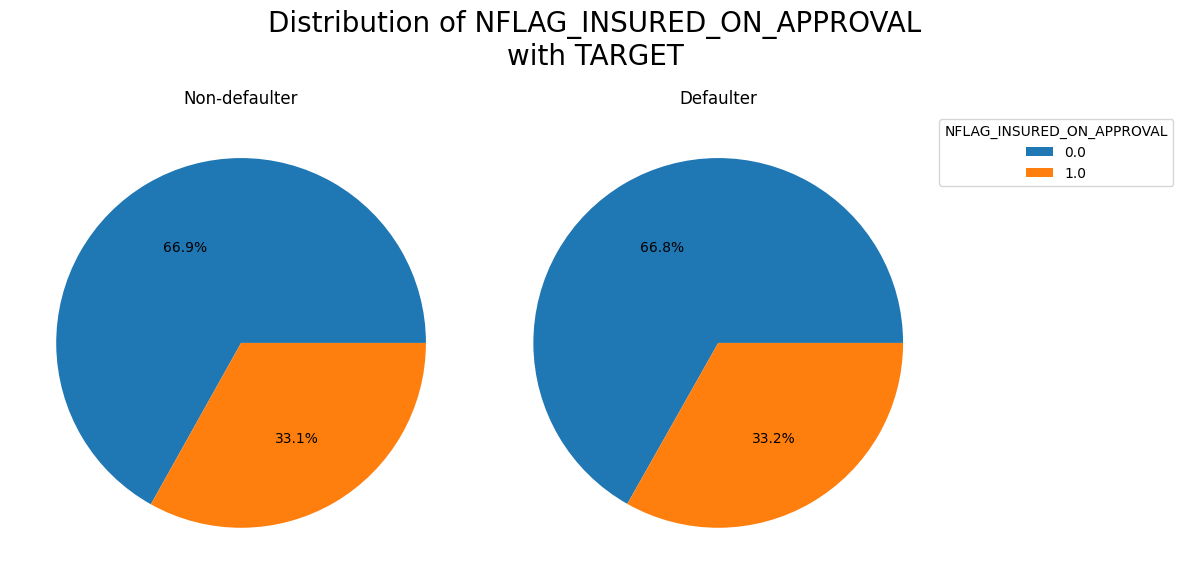

In [241]:
plot_defaulter_comparison(prev_app_merged, 'NFLAG_INSURED_ON_APPROVAL')

NFLAG_INSURED_ON_APPROVAL: Did the client requested insurance during the previous application. No difference between defaulter and non_defaulter

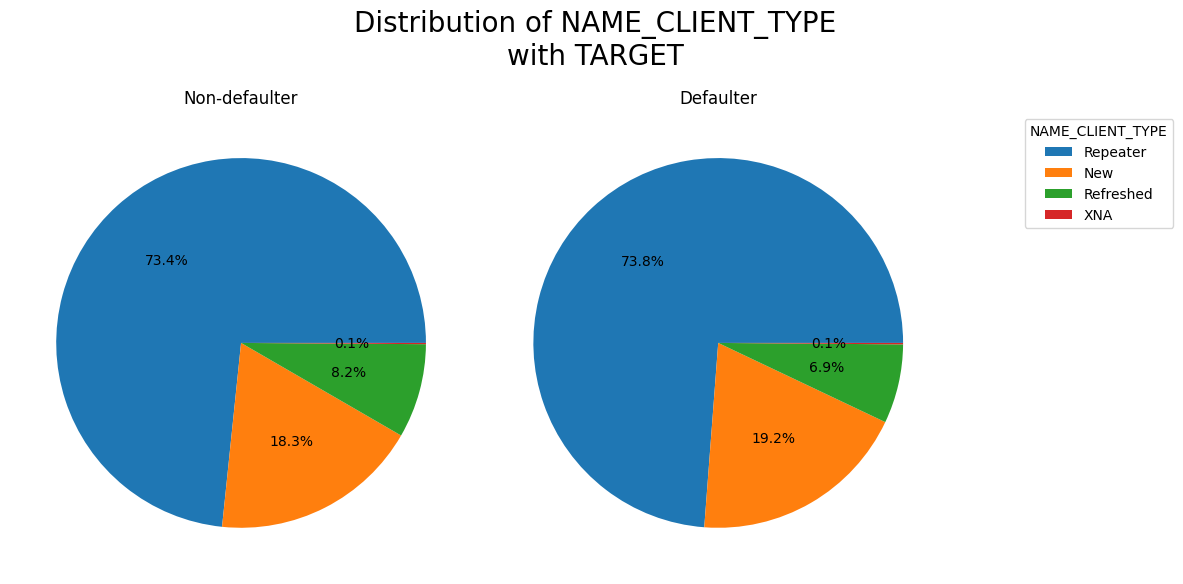

In [242]:
plot_defaulter_comparison(prev_app_merged, "NAME_CLIENT_TYPE")


**Most borrowers are repeated customers (high loyalty)**

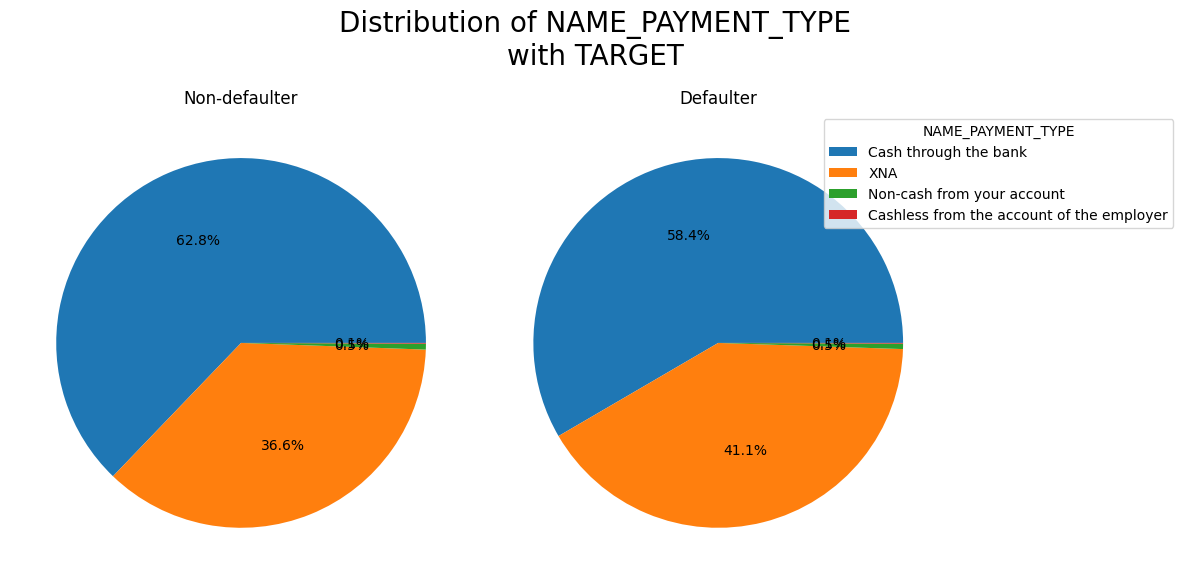

In [243]:
plot_defaulter_comparison(prev_app_merged, "NAME_PAYMENT_TYPE")

**Customers mostly pay back through cash through the bank (from bank to bank, in bank)**

In [244]:
def defaulter_percentage_count_per_cat(df, col):
    """
    Calculates the percentage of defaulters for each category in a column.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        col (str): The column to compute defaulter percentages for.

    Returns:
        pd.DataFrame: DataFrame with categories and their corresponding defaulter percentages.
    """
    if col not in df.columns or "TARGET" not in df.columns:
        print(f"Column '{col}' or 'TARGET' is missing in the dataset.")
        return pd.DataFrame()
    
    if df.empty:
        print("The DataFrame is empty.")
        return pd.DataFrame()
    
    grouped = df.groupby(col)['TARGET'].agg(['sum', 'count']).reset_index()
    grouped.columns = ['Categories', 'Default_Count', 'Total_Count']
    grouped['Percentage_Of_Default'] = (grouped['Default_Count'] / grouped['Total_Count']) * 100
    return grouped
    return grouped[['Categories', 'Percentage_Of_Default']].sort_values(by='Percentage_Of_Default', ascending=False)

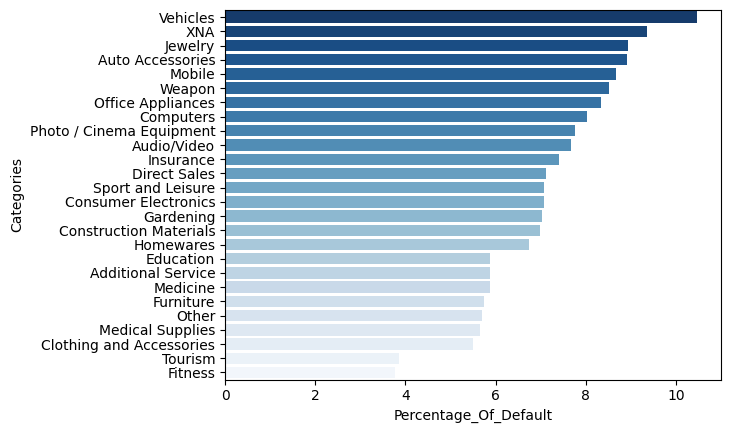

In [258]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_GOODS_CATEGORY")
data = data.sort_values(by="Percentage_Of_Default", ascending=False)
sns.barplot(data= data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.show()
## Vehicles has the highest debt ratio

In [246]:
df = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_GOODS_CATEGORY")
df

,Categories,Default_Count,Total_Count,Percentage_Of_Default
0,Additional Service,5,85,5.882353
1,Audio/Video,5244,68345,7.672836
2,Auto Accessories,446,4999,8.921784
3,Clothing and Accessories,862,15674,5.499553
4,Computers,5775,71986,8.022393
5,Construction Materials,1196,17141,6.977423
6,Consumer Electronics,5903,83526,7.067260
7,Direct Sales,19,267,7.116105
8,Education,4,68,5.882353
9,Fitness,5,133,3.759398


**Vehicle category has the highest percentage of defaulters (TARGET=1)**

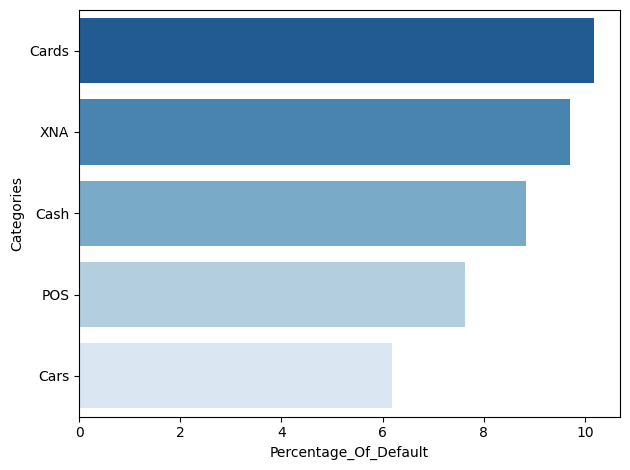

In [259]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_PORTFOLIO")
data = data.sort_values(by="Percentage_Of_Default", ascending=False)
sns.barplot(data= data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")

plt.tight_layout()
plt.show()
## Cards has the highest debt ratio

**The previous loan that have NAME_PORTFOLIO = 'Cards' have the highest percentage of defaulters**

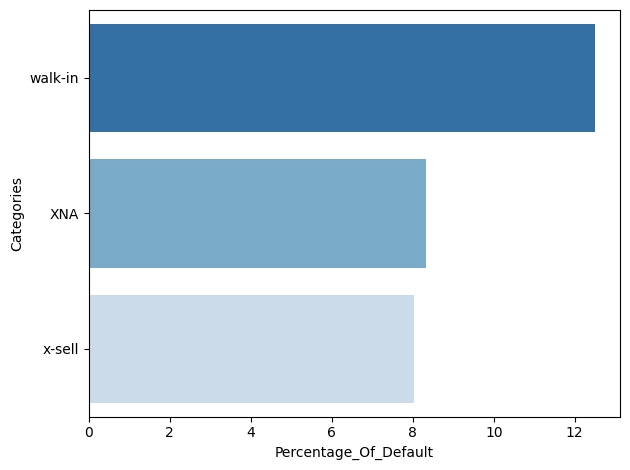

In [260]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_PRODUCT_TYPE")
data = data.sort_values(by="Percentage_Of_Default", ascending=False)
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.tight_layout()
plt.show()
## walk-in has the highest debt ratio

- walk-in: customers come direct to make a loan 
- x-sell: cross-sell, customers using loan with other products
- Customers tend to go to the branch to make loans if we do not consider the unknown number in category

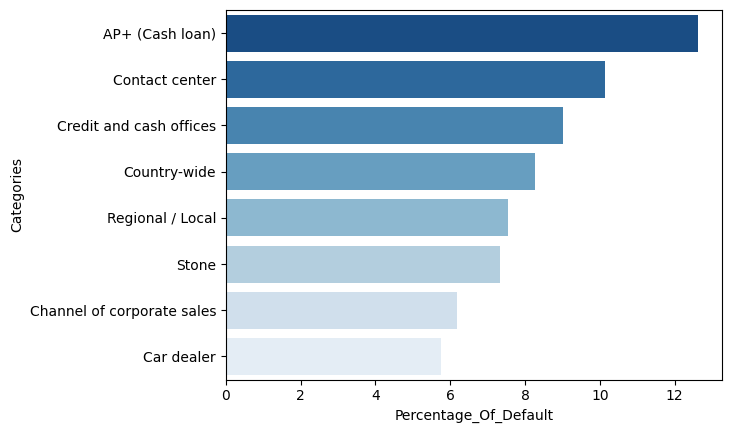

In [261]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "CHANNEL_TYPE")
data = data.sort_values(by="Percentage_Of_Default", ascending=False)
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.show()
## AP+ has the highest debt ratio

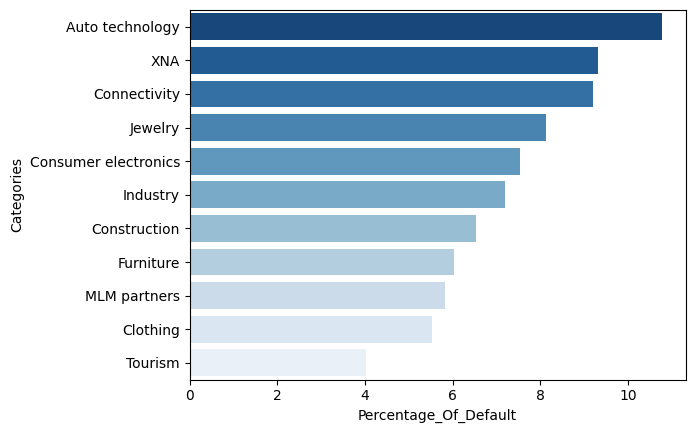

In [250]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_SELLER_INDUSTRY")
data = data.sort_values(by="Percentage_Of_Default", ascending=False)
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.show()
## Auto technology has the highest percent of defaulters

NAME_YIELD_GROUP: Grouped interest rate into small medium and high of the previous application

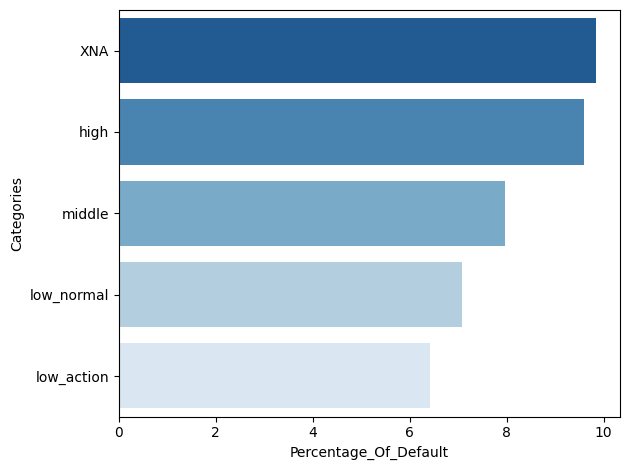

In [251]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_YIELD_GROUP")
data = data.sort_values(by="Percentage_Of_Default", ascending=False)
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")

plt.tight_layout()
plt.show()
## There is the highest percent of loans that weren't be grouped in any group of interest rate

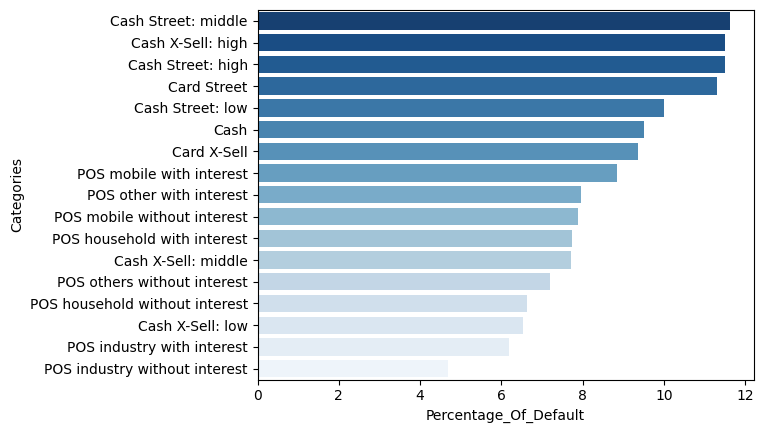

In [252]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "PRODUCT_COMBINATION")
data = data.sort_values(by="Percentage_Of_Default", ascending=False)
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= 'Blues_r')
plt.show()
## Cash Street: middle has the highest debt ratio

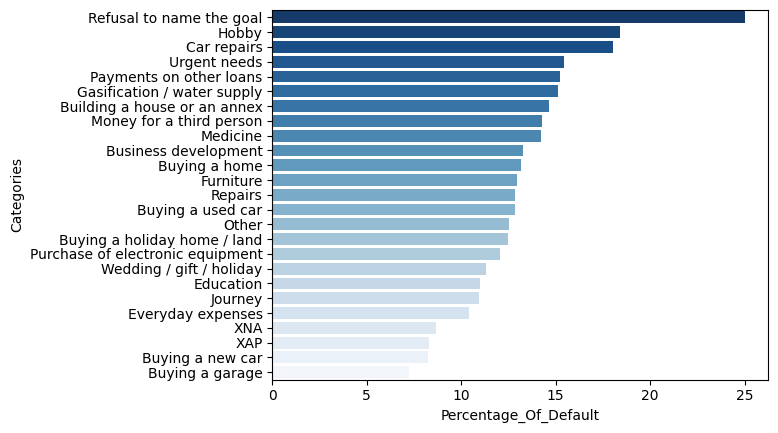

In [253]:
data = defaulter_percentage_count_per_cat(prev_app_merged, "NAME_CASH_LOAN_PURPOSE")
data = data.sort_values(by="Percentage_Of_Default", ascending=False)
sns.barplot(data = data, y= "Categories", x= "Percentage_Of_Default", palette= "Blues_r")
plt.show()
## Refusal to name the goal & Hobby has the highest percent of defaulter

The loan purpose of who are refusing to name the goal have the highest percentage_of_default. 

## Observations 5

#### **Imbalance Ratios**
Severe class imbalance is observed in the he 'NFLAG_LAST_APPL_IN_DAY' column. Addressing this imbalance is critical to improving model performance. There are some columns with absent imbalance ratio, this can be due to the none values in these columns

#### **Outliers**
The prev_application dataset contains potential outliers, especially in numerical columns. Evaluating these outliers and applying appropriate handling techniques will enhance data reliability.

#### **Missing Values**
Several columns have high percentages of missing values:
- `RATE_DOWN_PAYMENT`: 53.02%
- `AMT_DOWN_PAYMENT`: 53.02%
- `NAME_TYPE_SUITE`: 49.14%
- `DAYS_LAST_DUE`, `DAYS_FIRST_DRAWING`, `DAYS_LAST_DUE_1ST_VERSION`, `DAYS_FIRST_DUE`, `DAYS_TERMINATION`, `NFLAG_INSURED_ON_APPROVAL`: All have 39.69%
- `AMT_GOODS_PRICE`: 22.60%
- `AMT_ANNUITY` and `CNT_PAYMENT`: 21.73%
Address these missing values through imputation strategies or removal, depending on their impact on the analysis.

#### **Category Columns**
Features with no missing values but varying numbers of unique values have been identified. Some categorical columns contain a small number of unique values, while others exhibit more diverse categories, requiring tailored preprocessing approaches.


In [254]:
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   SK_ID_CURR                   1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413701 non-null  object 
 3   AMT_ANNUITY                  1106483 non-null  float64
 4   AMT_APPLICATION              1413701 non-null  float64
 5   AMT_CREDIT                   1413701 non-null  float64
 6   AMT_DOWN_PAYMENT             664161 non-null   float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 12  RATE_DOWN_PAYMENT            664161 non-nu

In [255]:
prev_app_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144074 entries, 0 to 1144073
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1144074 non-null  int64  
 1   TARGET                       1144074 non-null  int64  
 2   SK_ID_PREV                   1130891 non-null  float64
 3   NAME_CONTRACT_TYPE           1130891 non-null  object 
 4   AMT_ANNUITY                  885179 non-null   float64
 5   AMT_APPLICATION              1130891 non-null  float64
 6   AMT_CREDIT                   1130891 non-null  float64
 7   AMT_DOWN_PAYMENT             530908 non-null   float64
 8   AMT_GOODS_PRICE              875347 non-null   float64
 9   WEEKDAY_APPR_PROCESS_START   1130891 non-null  object 
 10  HOUR_APPR_PROCESS_START      1130891 non-null  float64
 11  FLAG_LAST_APPL_PER_CONTRACT  1130891 non-null  object 
 12  NFLAG_LAST_APPL_IN_DAY       1130891 non-n